# 0. **Data Collection** for Problem

### 0-1. **Import Basic Libraries**

In [614]:
import numpy as np
import scipy as sp
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
import pmdarima as pm
import itertools

import glob
import os
import datetime

from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score

from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from pmdarima.arima import auto_arima

from statsmodels.tsa.arima_model import ARIMA
from statsmodels.tsa.stattools import adfuller
from statsmodels.tsa.stattools import kpss
from statsmodels.tsa.stattools import acf, pacf
from datetime import datetime
from scipy import stats
from scipy.stats import boxcox
import statsmodels.tsa as smt

import warnings
warnings.filterwarnings('ignore')
%matplotlib inline


### 0-2. **Problem Setting**

**The earth is changing rapidly due to intensifying global warming.** 

Changes are taking place in various natural environments over time, which may have a significant impact on human survival in the future. 

So, we will **forecasting** the future using global surface temperature and sea surface temperature time series data. 

In addition, by confirming a **significant correlation** between the two variables, we try to talk about the **importance of environmental protection** by linking the damage caused by rising sea levels to global warming.

### 0-3. **Loading Dataset**

In [615]:
# Load surface temperature data

df_temp = pd.read_csv("C:/Users/USER/Desktop/Time Series Analysis/Term Project/Surface_Temperature.csv")
df_sea = pd.read_csv("C:/Users/USER/Desktop/Time Series Analysis/Term Project/Sea_Levels.csv")

# 1. **Dataset**

### **Surface Temperature**

In [616]:
df_temp.head(5)

,ObjectId,Country,ISO2,ISO3,Indicator,Unit,Source,CTS_Code,CTS_Name,CTS_Full_Descriptor,...,F2013,F2014,F2015,F2016,F2017,F2018,F2019,F2020,F2021,F2022
0,1,"Afghanistan, Islamic Rep. of",AF,AFG,Temperature change with respect to a baseline ...,Degree Celsius,Food and Agriculture Organization of the Unite...,ECCS,Surface Temperature Change,"Environment, Climate Change, Climate Indicator...",...,1.281,0.456,1.093,1.555,1.540,1.544,0.910,0.498,1.327,2.012
1,2,Albania,AL,ALB,Temperature change with respect to a baseline ...,Degree Celsius,Food and Agriculture Organization of the Unite...,ECCS,Surface Temperature Change,"Environment, Climate Change, Climate Indicator...",...,1.333,1.198,1.569,1.464,1.121,2.028,1.675,1.498,1.536,1.518
2,3,Algeria,DZ,DZA,Temperature change with respect to a baseline ...,Degree Celsius,Food and Agriculture Organization of the Unite...,ECCS,Surface Temperature Change,"Environment, Climate Change, Climate Indicator...",...,1.192,1.690,1.121,1.757,1.512,1.210,1.115,1.926,2.330,1.688
3,4,American Samoa,AS,ASM,Temperature change with respect to a baseline ...,Degree Celsius,Food and Agriculture Organization of the Unite...,ECCS,Surface Temperature Change,"Environment, Climate Change, Climate Indicator...",...,1.257,1.170,1.009,1.539,1.435,1.189,1.539,1.430,1.268,1.256
4,5,"Andorra, Principality of",AD,AND,Temperature change with respect to a baseline ...,Degree Celsius,Food and Agriculture Organization of the Unite...,ECCS,Surface Temperature Change,"Environment, Climate Change, Climate Indicator...",...,0.831,1.946,1.690,1.990,1.925,1.919,1.964,2.562,1.533,3.243


In [617]:
df_temp.columns

Index(['ObjectId', 'Country', 'ISO2', 'ISO3', 'Indicator', 'Unit', 'Source',
       'CTS_Code', 'CTS_Name', 'CTS_Full_Descriptor', 'F1961', 'F1962',
       'F1963', 'F1964', 'F1965', 'F1966', 'F1967', 'F1968', 'F1969', 'F1970',
       'F1971', 'F1972', 'F1973', 'F1974', 'F1975', 'F1976', 'F1977', 'F1978',
       'F1979', 'F1980', 'F1981', 'F1982', 'F1983', 'F1984', 'F1985', 'F1986',
       'F1987', 'F1988', 'F1989', 'F1990', 'F1991', 'F1992', 'F1993', 'F1994',
       'F1995', 'F1996', 'F1997', 'F1998', 'F1999', 'F2000', 'F2001', 'F2002',
       'F2003', 'F2004', 'F2005', 'F2006', 'F2007', 'F2008', 'F2009', 'F2010',
       'F2011', 'F2012', 'F2013', 'F2014', 'F2015', 'F2016', 'F2017', 'F2018',
       'F2019', 'F2020', 'F2021', 'F2022'],
      dtype='object')

In [618]:
df_temp.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 225 entries, 0 to 224
Data columns (total 72 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   ObjectId             225 non-null    int64  
 1   Country              225 non-null    object 
 2   ISO2                 223 non-null    object 
 3   ISO3                 225 non-null    object 
 4   Indicator            225 non-null    object 
 5   Unit                 225 non-null    object 
 6   Source               225 non-null    object 
 7   CTS_Code             225 non-null    object 
 8   CTS_Name             225 non-null    object 
 9   CTS_Full_Descriptor  225 non-null    object 
 10  F1961                188 non-null    float64
 11  F1962                189 non-null    float64
 12  F1963                188 non-null    float64
 13  F1964                188 non-null    float64
 14  F1965                188 non-null    float64
 15  F1966                192 non-null    flo

### **Sea Level**

In [619]:
df_sea.head(5)

,ObjectId,Country,ISO2,ISO3,Indicator,Unit,Source,CTS_Code,CTS_Name,CTS_Full_Descriptor,Measure,Date,Value
0,1,World,NaN,WLD,Change in mean sea level: Sea level: TOPEX.Pos...,Millimeters,National Oceanic and Atmospheric Administratio...,ECCL,Change in Mean Sea Level,"Environment, Climate Change, Climate Indicator...",Andaman Sea,D12/17/1992,-10.34
1,2,World,NaN,WLD,Change in mean sea level: Sea level: TOPEX.Pos...,Millimeters,National Oceanic and Atmospheric Administratio...,ECCL,Change in Mean Sea Level,"Environment, Climate Change, Climate Indicator...",Arabian Sea,D12/17/1992,-18.46
2,3,World,NaN,WLD,Change in mean sea level: Sea level: TOPEX.Pos...,Millimeters,National Oceanic and Atmospheric Administratio...,ECCL,Change in Mean Sea Level,"Environment, Climate Change, Climate Indicator...",Atlantic Ocean,D12/17/1992,-15.41
3,4,World,NaN,WLD,Change in mean sea level: Sea level: TOPEX.Pos...,Millimeters,National Oceanic and Atmospheric Administratio...,ECCL,Change in Mean Sea Level,"Environment, Climate Change, Climate Indicator...",Baltic Sea,D12/17/1992,196.85
4,5,World,NaN,WLD,Change in mean sea level: Sea level: TOPEX.Pos...,Millimeters,National Oceanic and Atmospheric Administratio...,ECCL,Change in Mean Sea Level,"Environment, Climate Change, Climate Indicator...",Bay Bengal,D12/17/1992,3.27


In [620]:
df_sea.columns

Index(['ObjectId', 'Country', 'ISO2', 'ISO3', 'Indicator', 'Unit', 'Source',
       'CTS_Code', 'CTS_Name', 'CTS_Full_Descriptor', 'Measure', 'Date',
       'Value'],
      dtype='object')

In [621]:
df_sea.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 35604 entries, 0 to 35603
Data columns (total 13 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   ObjectId             35604 non-null  int64  
 1   Country              35604 non-null  object 
 2   ISO2                 0 non-null      float64
 3   ISO3                 35604 non-null  object 
 4   Indicator            35604 non-null  object 
 5   Unit                 35604 non-null  object 
 6   Source               35604 non-null  object 
 7   CTS_Code             35604 non-null  object 
 8   CTS_Name             35604 non-null  object 
 9   CTS_Full_Descriptor  35604 non-null  object 
 10  Measure              35604 non-null  object 
 11  Date                 35604 non-null  object 
 12  Value                35604 non-null  float64
dtypes: float64(2), int64(1), object(10)
memory usage: 3.5+ MB


# 2. **Data Information (EDA)**

### 2-1. **Basic Preprocessing**

### **Surface Temperature**

In [622]:
# Use korea-measured data for our project.

df_temp_kor = df_temp[df_temp['Country']=='Korea, Rep. of'].copy()

df_temp_kor.drop(['ObjectId', 'Country', 'ISO2', 'ISO3', 'Indicator', 'Unit', 'Source','CTS_Code', 'CTS_Name', 'CTS_Full_Descriptor'], axis=1, inplace=True)

df_temp_kor.reset_index(inplace=True)

df_temp_kor

,index,F1961,F1962,F1963,F1964,F1965,F1966,F1967,F1968,F1969,...,F2013,F2014,F2015,F2016,F2017,F2018,F2019,F2020,F2021,F2022
0,105,0.637,-0.094,-0.472,0.608,-0.178,0.099,0.17,-0.678,-0.288,...,0.519,0.987,0.944,1.637,1.459,0.966,1.485,1.551,1.762,1.659


In [623]:
df_temp_kor = df_temp_kor.transpose().copy()

df_temp_kor.rename(columns={0:'Temp'}, inplace=True)
df_temp_kor.reset_index(inplace=True)

df_temp_kor.drop([0], axis=0, inplace=True)
df_temp_kor.reset_index(inplace=True)

df_temp_kor.drop(['level_0'], axis=1, inplace=True)
df_temp_kor.rename(columns={'index':'Fyear'}, inplace=True)

df_temp_kor

,Fyear,Temp
0,F1961,0.637
1,F1962,-0.094
2,F1963,-0.472
3,F1964,0.608
4,F1965,-0.178
...,...,...
57,F2018,0.966
58,F2019,1.485
59,F2020,1.551
60,F2021,1.762


In [624]:
yr_split = df_temp_kor.Fyear.str.split('F')
yr_temp = yr_split.str.get(1)

df_temp_kor['Year'] = yr_temp
df_temp_kor.drop(['Fyear'],axis=1,inplace=True)

df_temp_kor = df_temp_kor[['Year', 'Temp']]

df_temp_kor.set_index('Year', inplace=True)

In [625]:
df_temp_kor.info()

<class 'pandas.core.frame.DataFrame'>
Index: 62 entries, 1961 to 2022
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Temp    62 non-null     float64
dtypes: float64(1)
memory usage: 992.0+ bytes


### **Sea Level**

In [626]:
df_sea_world = df_sea[df_sea['Measure']=='World'].copy()
df_sea_world.drop(['ObjectId', 'Country', 'ISO2', 'ISO3', 'Indicator', 'Unit', 'Source', 'CTS_Code', 'CTS_Name', 'CTS_Full_Descriptor', 'Measure'], axis=1, inplace=True)
df_sea_world.reset_index(inplace=True)
df_sea_world.drop(['index'], axis=1, inplace=True)

df_sea_world

,Date,Value
0,D12/17/1992,-15.95
1,D12/27/1992,-17.65
2,D01/05/1993,-14.55
3,D01/15/1993,-19.55
4,D01/25/1993,-24.95
...,...,...
1421,D10/10/2022,82.98
1422,D10/19/2022,82.68
1423,D10/30/2022,83.48
1424,D11/08/2022,84.28


In [627]:
df_sea_world.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1426 entries, 0 to 1425
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Date    1426 non-null   object 
 1   Value   1426 non-null   float64
dtypes: float64(1), object(1)
memory usage: 22.4+ KB


### 2-2. **Statistical Summary**

### **Surface Temperature**

In [628]:
df_temp_kor.describe()

,Temp
count,62.000000
mean,0.485871
std,0.657731
min,-0.808000
25%,0.054750
50%,0.507000
75%,0.945500
max,1.762000


### **Sea Level**

In [629]:
df_sea_world['Value'].describe()

count    1426.000000
mean       25.098927
std        24.743281
min       -29.050000
25%         6.975000
50%        22.100000
75%        44.415000
max        84.380000
Name: Value, dtype: float64

### 2-3. **Visualization**

### **Surface Temperature**

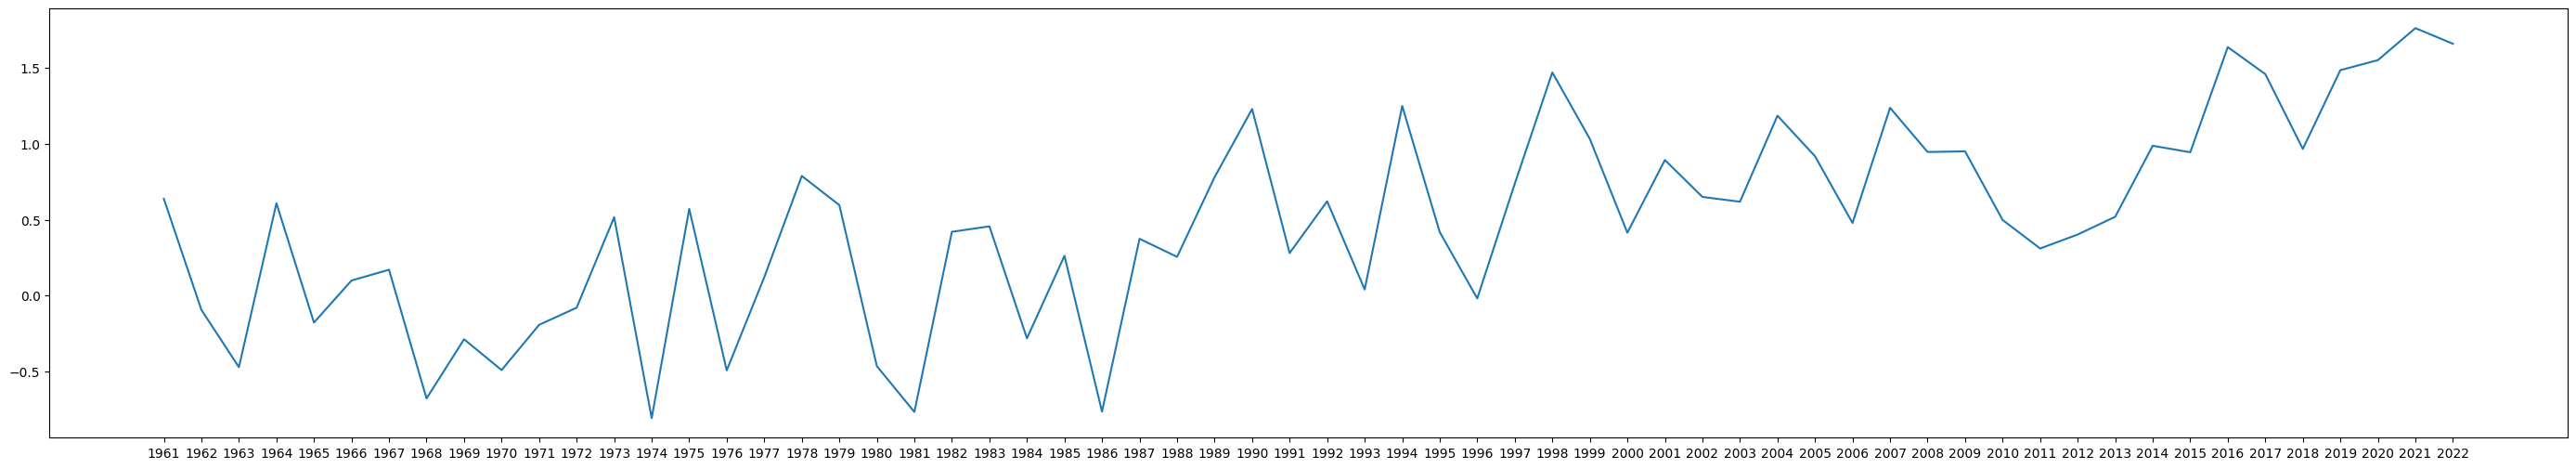

In [630]:
#시계열 안정성의 정성적 분석
from matplotlib.pylab import rcParams
rcParams['figure.figsize'] = 35, 6 

# 시계열(time series) 데이터를 차트로 그려 봅시다. 특별히 더 가공하지 않아도 잘 그려집니다.
plt.plot(df_temp_kor)

(<Axes: >, <seaborn.axisgrid.FacetGrid at 0x1a7775372b0>)

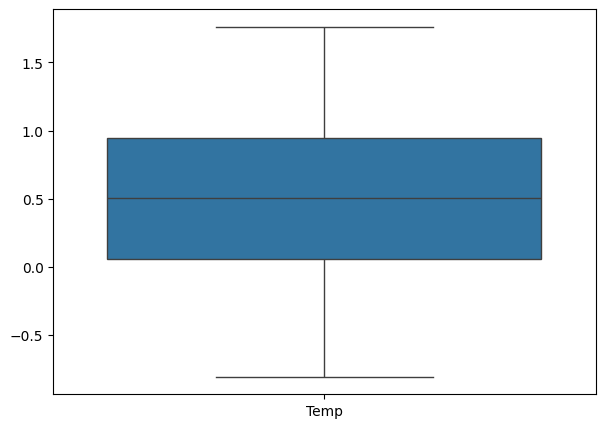

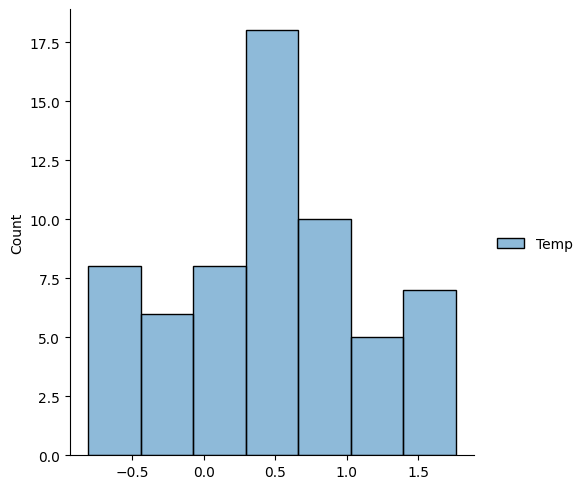

In [631]:
ax = plt.subplots(figsize = (7,5))
sns.boxplot(df_temp_kor), sns.displot(df_temp_kor)

### **Sea Level**

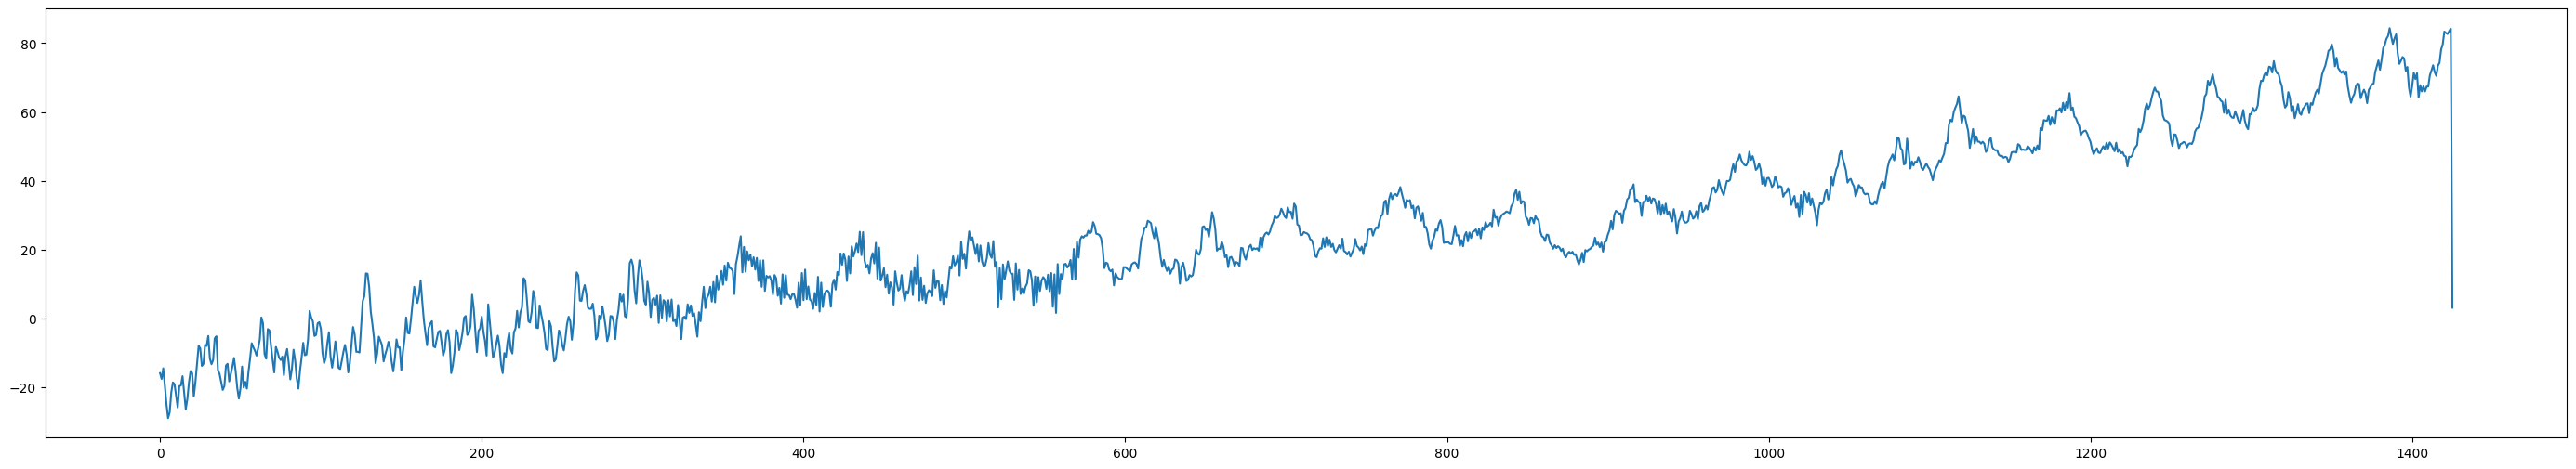

In [632]:
plt.plot(df_sea_world['Value'])

(<Axes: >, <seaborn.axisgrid.FacetGrid at 0x1a7644d7520>)

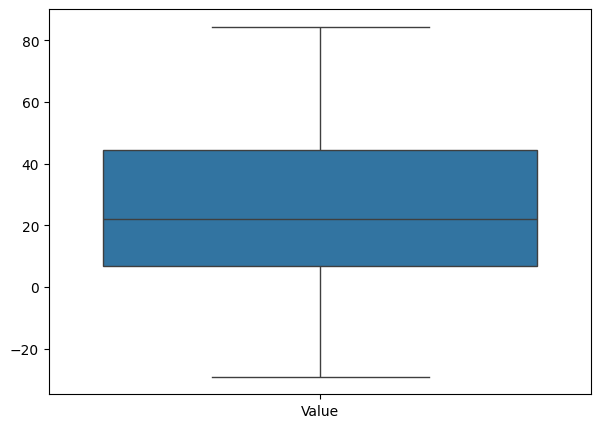

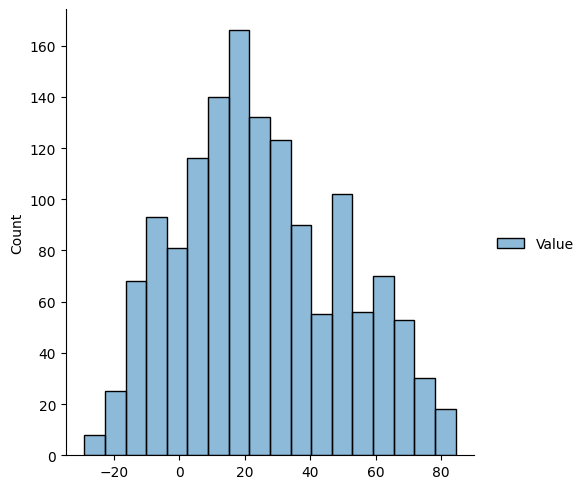

In [633]:
ax = plt.subplots(figsize = (7,5))
sns.boxplot(df_sea_world), sns.displot(df_sea_world)

# 3. Data **Pre-processing**

### 3-1. **Chronological Order** and **Equidistant Timestamps**

The surface temperature data in **'df_temp_kor'** is already **Chronological Order** and **Equidistant Timestamps**, as such, no additional scaling is required.

This can be demonstrated through the process of **3-2.** below.

In [634]:
#sea level 연간 평균
df_sea_world['Date'] = df_sea_world['Date'].str.replace('D', '')
df_sea_world['Date'] = pd.to_datetime(df_sea_world['Date'], format='%m/%d/%Y')

df_sea_world['Year'] = df_sea_world['Date'].dt.year

df_sea_yearly = df_sea_world.groupby('Year')['Value'].mean().reset_index()

In [635]:
df_sea_yearly['Year'] = pd.to_datetime(df_sea_yearly['Year'], format='%Y')

In [636]:
df_sea_yearly.set_index('Year', inplace=True)
df_sea_yearly

,Value
Year,
1992-01-01,-16.800000
1993-01-01,-16.729412
1994-01-01,-13.126471
1995-01-01,-9.618750
1996-01-01,-6.256061
1997-01-01,-4.489394
1998-01-01,-4.950000
1999-01-01,-3.274242
2000-01-01,-1.023529


### 3-2. Handling **Missing Values**

Since there are zero null values, this is **Chronological Order** and **Equidistant Timestamps**, time series data **without missing values**.

In [637]:
np.array(np.sum(pd.isnull(df_temp_kor))) #1961~2022, Non-Null(number of null = 0)

array([0], dtype=int64)

In [638]:
np.array(np.sum(pd.isnull(df_sea_world))) #1992~2022, Non-Null(number of null = 0)

array([0, 0, 0], dtype=int64)

### 3-3. **Stationarity** and **Differencing**

The first thing we need to do is producing a plot of our time series dataset. 

From the plot, we will get an idea about the overall trend and seasonality of the series. 

Then, we will use a statistical method to assess the trend and seasonality of the dataset. 

After trend and seasonality are assessed if they are present in the dataset, they will be removed from the series to transform the nonstationary dataset into stationary and the residuals are further analyzed.

### **Surface Temperature**

In [639]:
def plot_rolling_statistics(timeseries, window=4):
    
    rolmean = timeseries.rolling(window=window).mean()  # 이동평균 시계열
    rolstd = timeseries.rolling(window=window).std()    # 이동표준편차 시계열

     # 원본시계열, 이동평균, 이동표준편차를 plot으로 시각화해 본다.
    orig = plt.plot(timeseries, color='blue',label='Original')    
    mean = plt.plot(rolmean, color='red', label='Rolling Mean')
    std = plt.plot(rolstd, color='black', label='Rolling Std')
    plt.legend(loc='best')
    plt.title('Rolling Mean & Standard Deviation')
    plt.show(block=False)

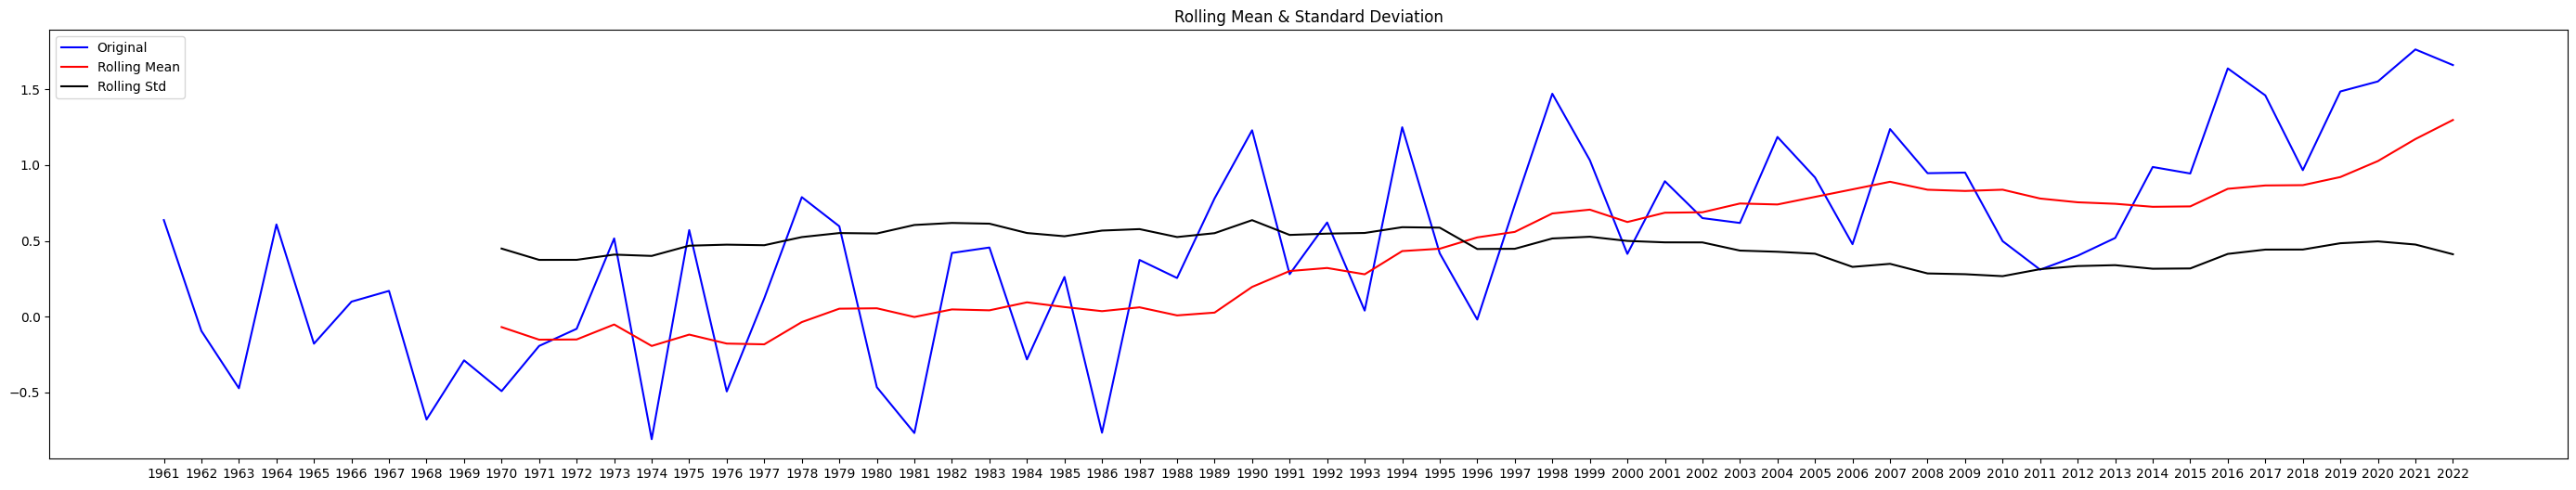

In [640]:
plot_rolling_statistics(df_temp_kor, window=10)

In [641]:
# Get log-transfromed data
df_temp_kor_log = np.log(df_temp_kor)

When log-tranformation is performed on data that have already been first-differentiated, there is a problem that **some values have missing values**.

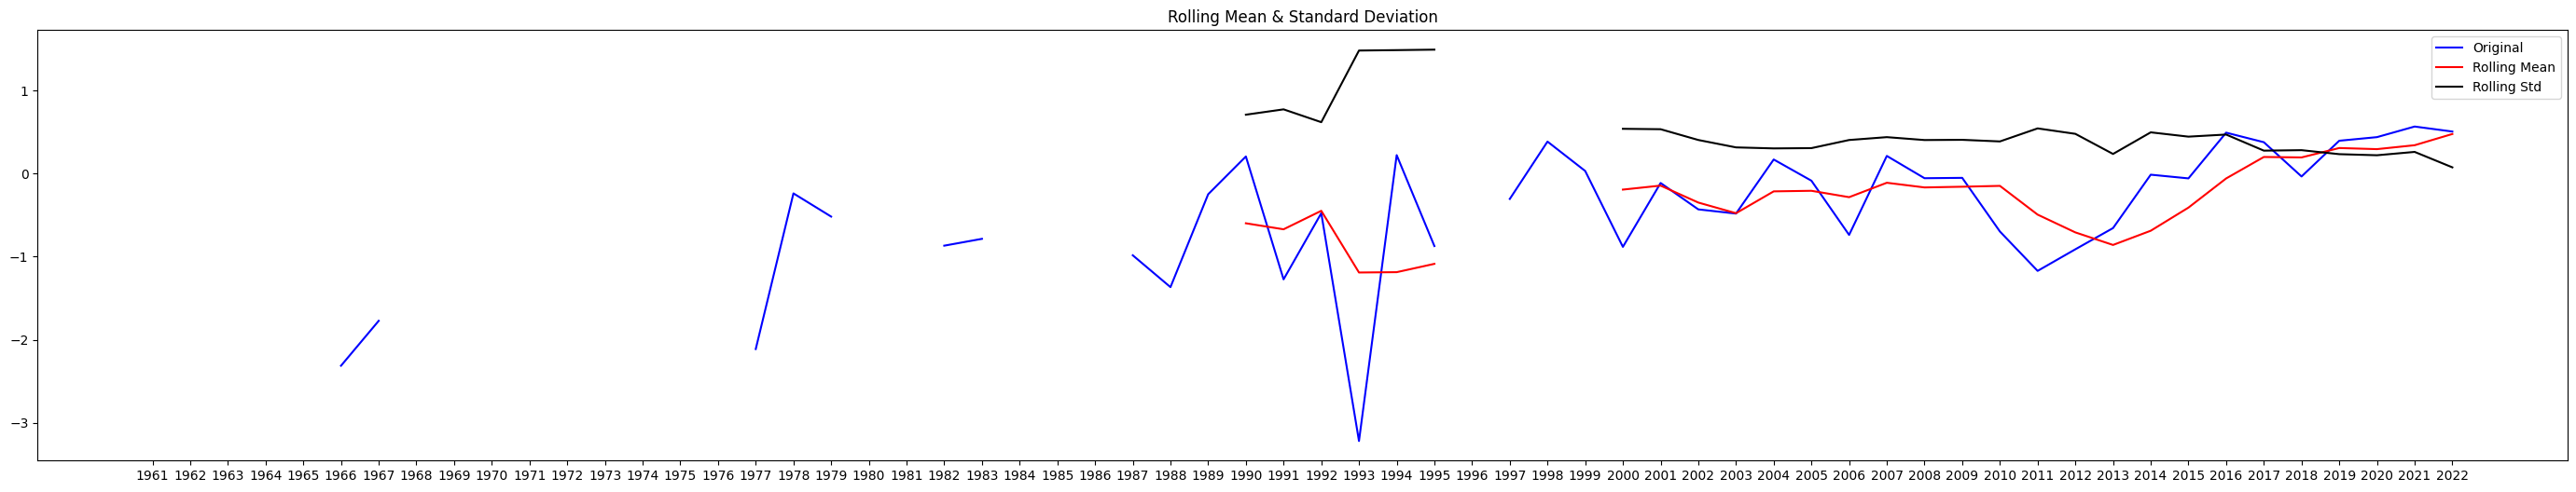

In [642]:
plot_rolling_statistics(df_temp_kor_log, window=4)

In [643]:
from statsmodels.tsa.stattools import adfuller

def augmented_dickey_fuller_test(timeseries):
    # statsmodels 패키지에서 제공하는 adfuller 메서드를 호출합니다.
    dftest = adfuller(timeseries, autolag='AIC')  
    
    # adfuller 메서드가 리턴한 결과를 정리하여 출력합니다.
    print('Results of Dickey-Fuller Test:')
    dfoutput = pd.Series(dftest[0:4], index=['Test Statistic','p-value','#Lags Used','Number of Observations Used'])
    for key,value in dftest[4].items():
        dfoutput['Critical Value (%s)' % key] = value
    print(dfoutput)

In [644]:
augmented_dickey_fuller_test(df_temp_kor)

Results of Dickey-Fuller Test:
Test Statistic                 -0.362295
p-value                         0.916206
#Lags Used                      4.000000
Number of Observations Used    57.000000
Critical Value (1%)            -3.550670
Critical Value (5%)            -2.913766
Critical Value (10%)           -2.594624
dtype: float64


The null hypothesis that the time series is not stable shows that the p-value is close to 1, which is not direct evidence that this null hypothesis is correct, but at least it is not possible to reject this null hypothesis, so it cannot be said that this time series is a stable time series.

Therefore, we can get **moving average** and **second-differencing** for stationary.

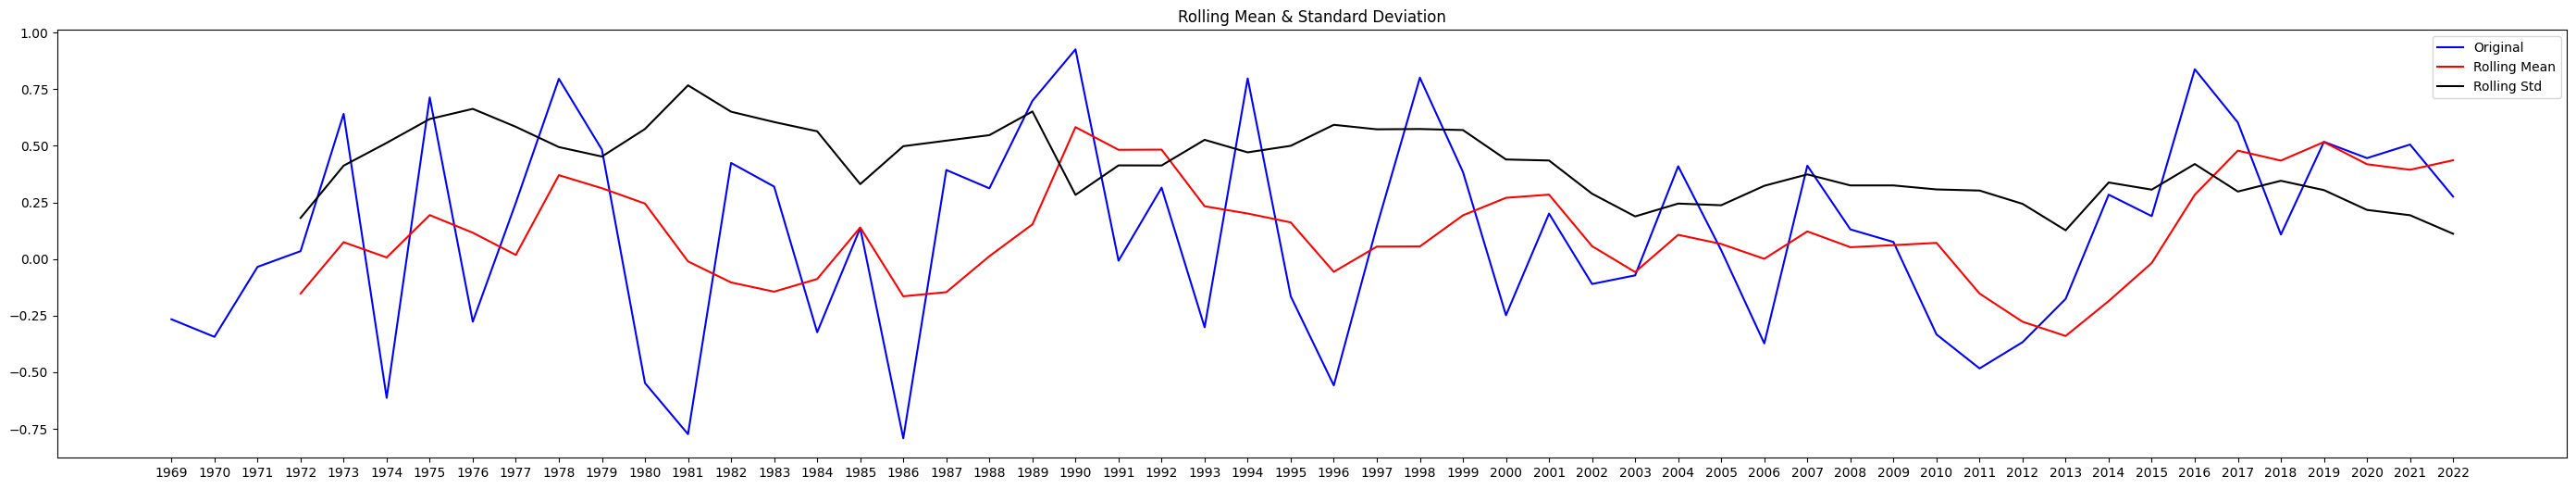

Results of Dickey-Fuller Test:
Test Statistic                -6.739686e+00
p-value                        3.141820e-09
#Lags Used                     0.000000e+00
Number of Observations Used    5.300000e+01
Critical Value (1%)           -3.560242e+00
Critical Value (5%)           -2.917850e+00
Critical Value (10%)          -2.596796e+00
dtype: float64


In [645]:
moving_avg = df_temp_kor.rolling(window=9).mean()  # moving average구하기
temp_moving_avg = df_temp_kor - moving_avg  # 변화량 제거

# window size를 3로 해주었기 때문에 맨 앞의 2개 데이터는
# Moving Average가 계산되지 않으므로 temp_moving_avg에 결측치(NaN)가 발생한다.
temp_moving_avg.dropna(inplace=True)

plot_rolling_statistics(temp_moving_avg)
augmented_dickey_fuller_test(temp_moving_avg)

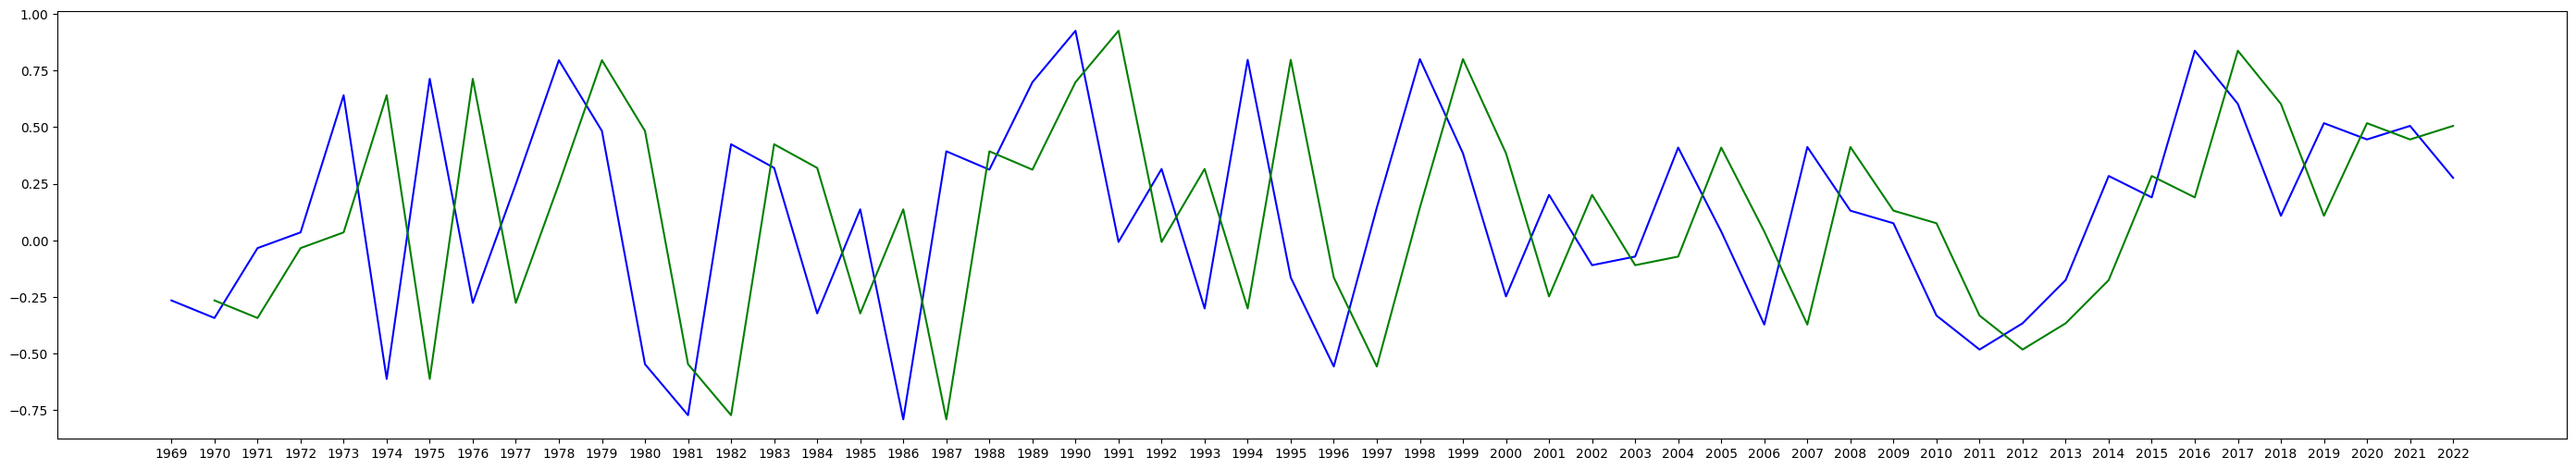

In [646]:
temp_moving_avg_shift = temp_moving_avg.shift()
plt.plot(temp_moving_avg, color='blue')
plt.plot(temp_moving_avg_shift, color='green')

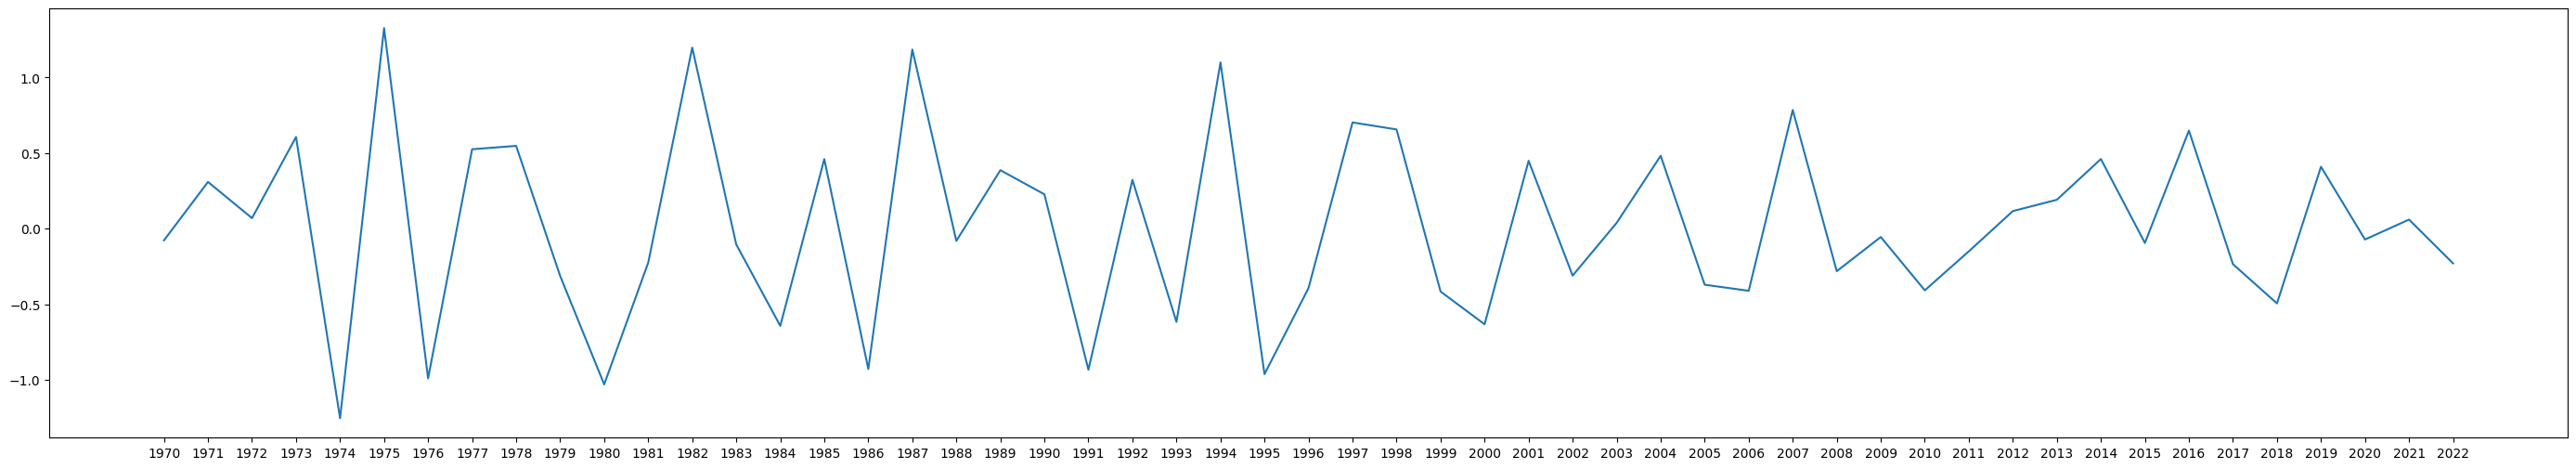

In [647]:
temp_moving_avg_diff = temp_moving_avg - temp_moving_avg_shift
temp_moving_avg_diff.dropna(inplace=True)
plt.plot(temp_moving_avg_diff)

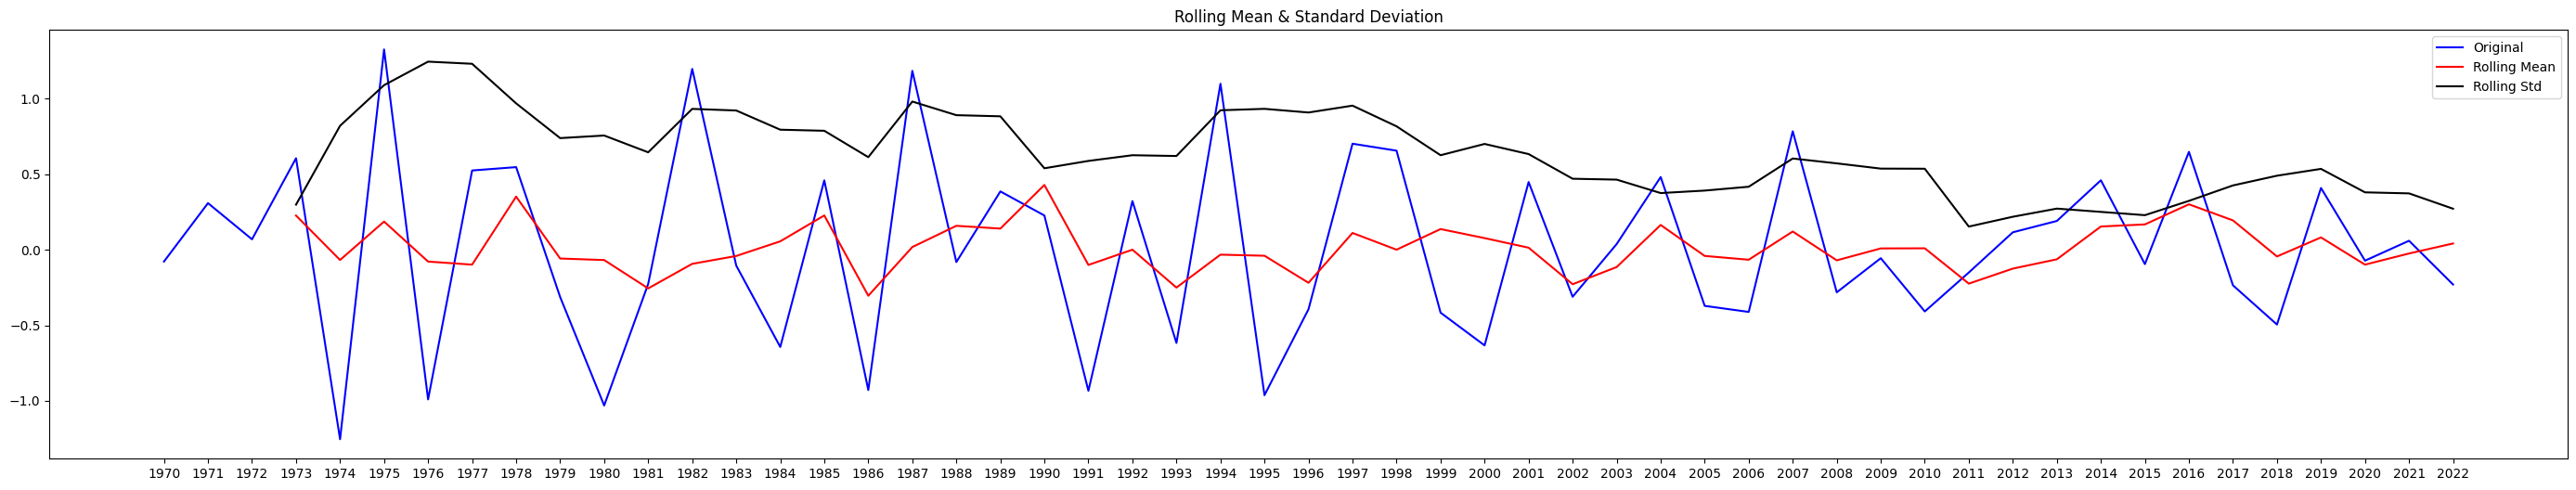

Results of Dickey-Fuller Test:
Test Statistic                -6.515551e+00
p-value                        1.073612e-08
#Lags Used                     3.000000e+00
Number of Observations Used    4.900000e+01
Critical Value (1%)           -3.571472e+00
Critical Value (5%)           -2.922629e+00
Critical Value (10%)          -2.599336e+00
dtype: float64


In [648]:
plot_rolling_statistics(temp_moving_avg_diff)
augmented_dickey_fuller_test(temp_moving_avg_diff)

p-value : 0.00000000314182 / It can be said that this time series data is stable with more than 99% reliability. 

So, our second-differentiated data: **'temp_moving_avg_diff'** is **stationary**.

### **Sea Level**

In [649]:
def tsplot(y, lags=None, figsize=(9, 6), style='bmh'):
    if not isinstance(y, pd.Series):
        y = pd.Series(y)
    with plt.style.context(style):    
        fig = plt.figure(figsize=figsize)
        #mpl.rcParams['font.family'] = 'Ubuntu Mono'
        layout = (3, 2)
        ts_ax = plt.subplot2grid(layout, (0, 0), colspan=2)
        acf_ax = plt.subplot2grid(layout, (1, 0))
        pacf_ax = plt.subplot2grid(layout, (1, 1))
        qq_ax = plt.subplot2grid(layout, (2, 0))
        pp_ax = plt.subplot2grid(layout, (2, 1))
        
        y.plot(ax=ts_ax)
        ts_ax.set_title('Time Series Analysis Plots')
        plot_acf(y, lags=lags, ax=acf_ax, alpha=0.05)
        plot_pacf(y, lags=lags, ax=pacf_ax, alpha=0.05)
        sm.qqplot(y, line='s', ax=qq_ax)
        qq_ax.set_title('QQ Plot')        
        stats.probplot(y, sparams=(y.mean(), y.std()), plot=pp_ax)

        plt.tight_layout()
    return 

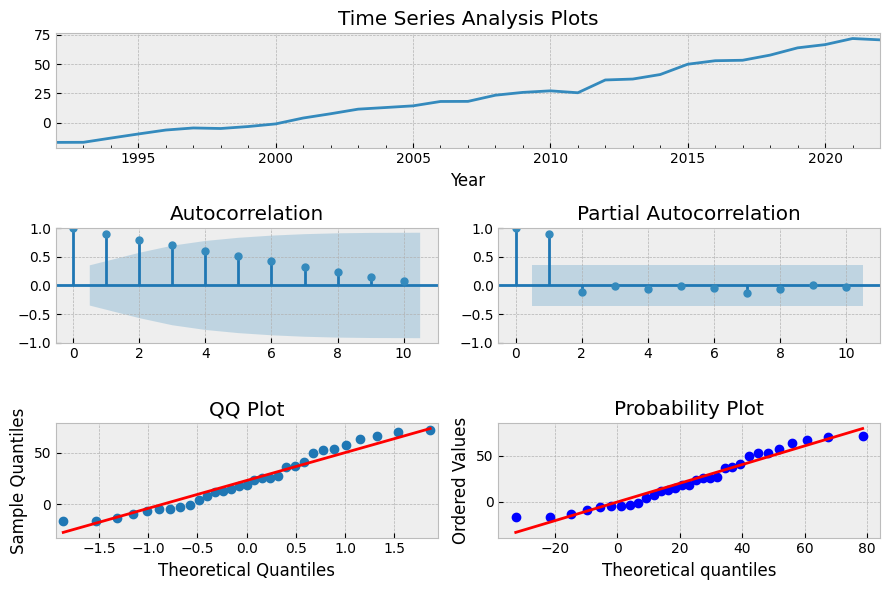

In [650]:
raw_sea = tsplot(df_sea_yearly['Value'], lags=10)

ACF are gradually decreasing, cuts off after 2. PACF cuts off after 1.
-> ARMA(1,2)
// Already stationary with ARMA(1,2)

In [651]:
df_log_sea_yearly = np.log(df_sea_yearly['Value'])

#1st differencing with logarithm
diff_df_log_sea_yearly = df_log_sea_yearly.diff(periods=1).iloc[1:]

#2nd differencing with logarithm
diff_2_df_log_sea_yearly = df_log_sea_yearly.diff(periods=2).iloc[2:]

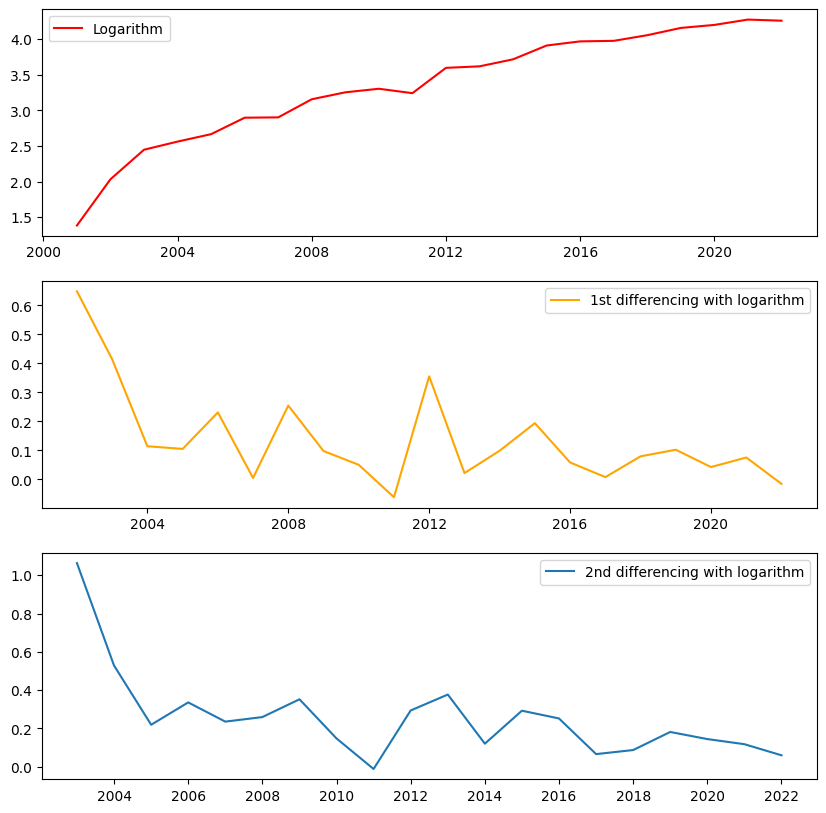

In [652]:
plt.figure(figsize=(10,10))

ax1 = plt.subplot(311)
ax1.plot(df_log_sea_yearly, color='red')
ax1.legend(['Logarithm'])


ax2 = plt.subplot(312)
ax2.plot(diff_df_log_sea_yearly, color='orange')
ax2.legend(['1st differencing with logarithm'])

ax3 =plt.subplot(313)
ax3.plot(diff_2_df_log_sea_yearly)
ax3.legend(['2nd differencing with logarithm'])

# 4. **Feature Engineering**

### 4-1. **Decomposition** Trends

On the global level, at least **100,000 years of record** is required to be seasonal. We use about 60 years of short time series data, so decomposition for seasonality is unnecessary. Period also does not exist.

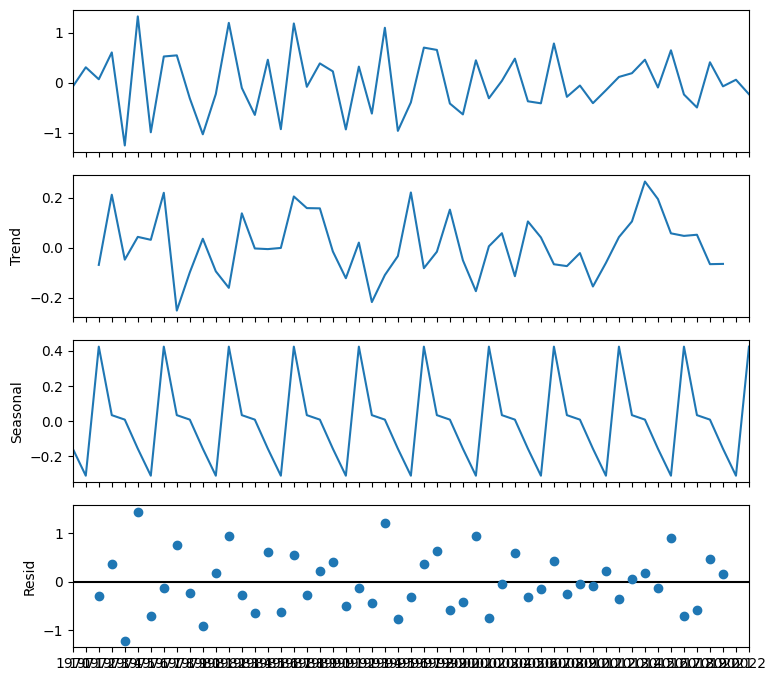

In [653]:
# unnecessary code

decomposition_temp = sm.tsa.seasonal_decompose(temp_moving_avg_diff, model='additive', period=5)  # Not Meaningful Period

ax = decomposition_temp.plot()
ax.set_size_inches(7,7)

plt.show()

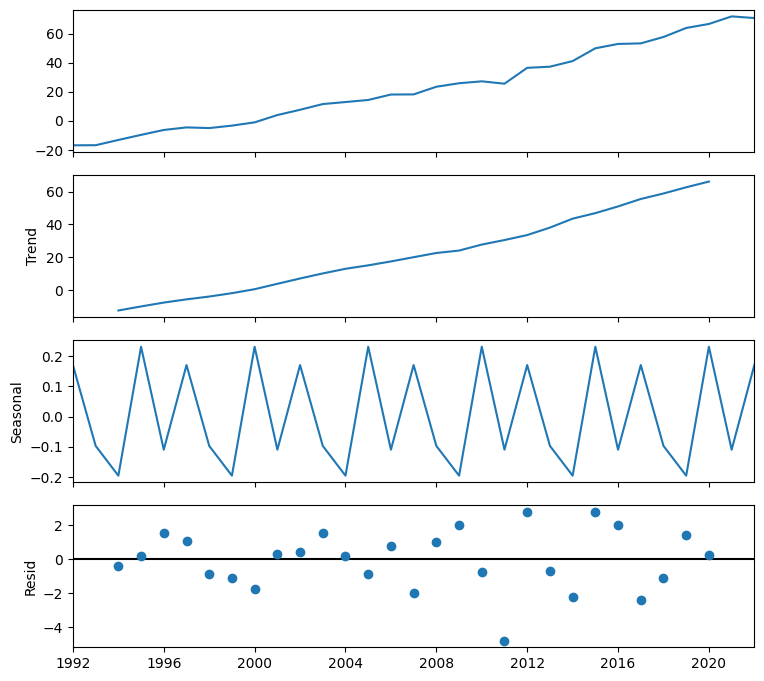

In [654]:
# unnecessary code

decomposition_sealv = sm.tsa.seasonal_decompose(df_sea_yearly, model='additive', period=5)  # Not Meaningful Period

ax = decomposition_sealv.plot()
ax.set_size_inches(7,7)

plt.show()

# 5. Model for Temperature Data & Sea Level

### 5-1. Reason for choosing model

**First, it has the advantage of being able to check the state of change even if there is no data other than time series data.**

Since our data consist of one variable, ARIMA is particularly suitable for use.

**Second, it can be applied to any time series and can be sensitively reflected, especially when data fluctuate quickly over time.**

Since the late 20th century, the surface temperature of the Earth has increased rapidly, and this is a situation where data fluctuate greatly. It is good to apply ARIMA here.

### 5-2. Models

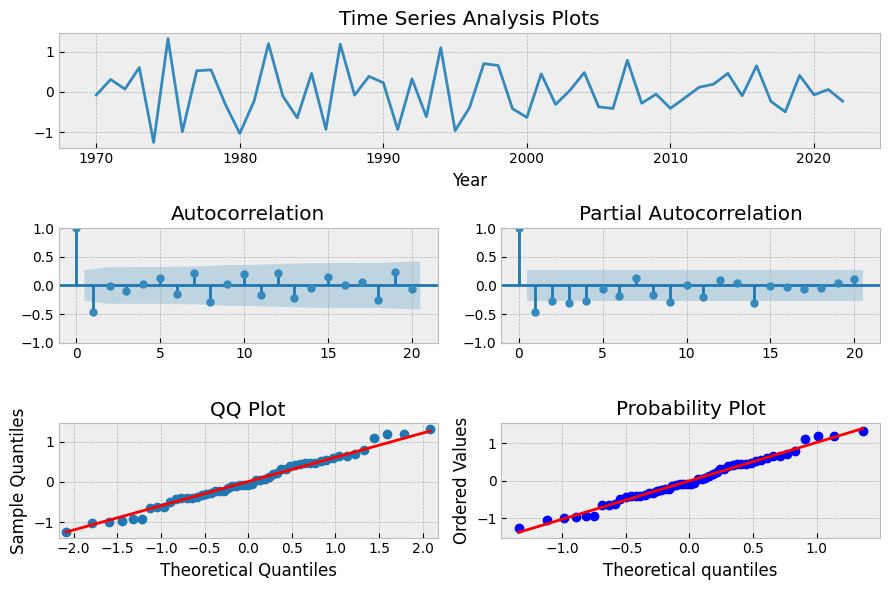

In [655]:
raw_data_temp_madiff = tsplot(temp_moving_avg_diff['Temp'], lags=20)

In case of **temp_moving_avg_diff** with d=1, It looks like: ACF plot cut off after lag 1 and PACF plot cut off after 6.

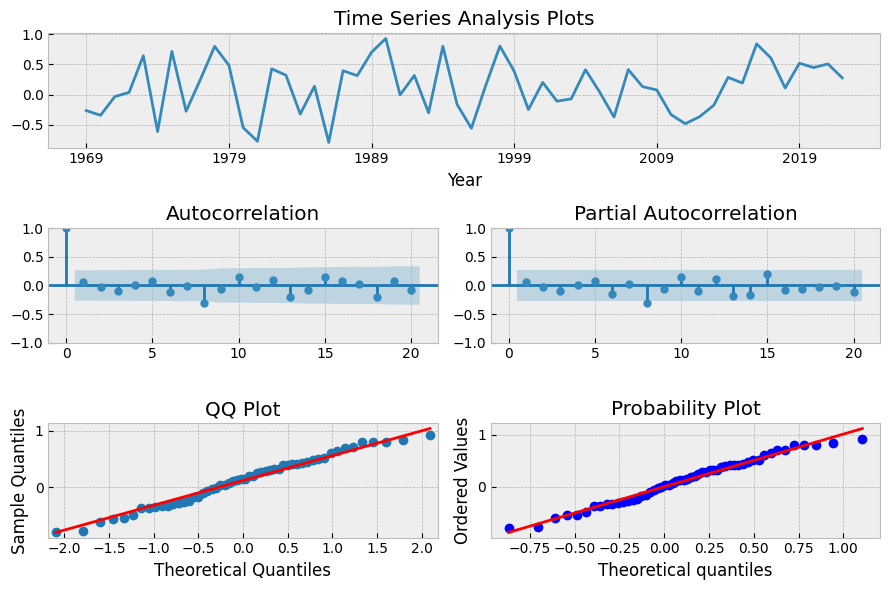

In [656]:
raw_data_temp_ma = tsplot(temp_moving_avg['Temp'], lags=20)

In case of **temp_moving_avg** with d=0, It looks like: ACF plot cut off after lag 2 and PACF plot cut off after 2.

And, below, nidff can get optimized d value so we use it.

In [657]:
import pmdarima as pm
from pmdarima.arima import ndiffs
data_temp_ma = temp_moving_avg
n_diffs = ndiffs(data, alpha=0.05, test='adf', max_d=6)
print(f"추정된 차수 d = {n_diffs}")

추정된 차수 d = 0


In [658]:
model_temp_ma = pm.auto_arima(
            y=temp_moving_avg, 
            d=1, 
            start_p=0, max_p=6, 
            start_q=0, max_q=6, 
            m=1, seasonal=False, # 계절성이 없음!
            stepwise=True,
            trace=True
)

Performing stepwise search to minimize aic
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=100.600, Time=0.02 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=90.202, Time=0.02 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=inf, Time=0.06 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=98.615, Time=0.01 sec
 ARIMA(2,1,0)(0,0,0)[0] intercept   : AIC=88.230, Time=0.03 sec
 ARIMA(3,1,0)(0,0,0)[0] intercept   : AIC=85.347, Time=0.04 sec
 ARIMA(4,1,0)(0,0,0)[0] intercept   : AIC=83.408, Time=0.04 sec
 ARIMA(5,1,0)(0,0,0)[0] intercept   : AIC=85.291, Time=0.05 sec
 ARIMA(4,1,1)(0,0,0)[0] intercept   : AIC=inf, Time=0.18 sec
 ARIMA(3,1,1)(0,0,0)[0] intercept   : AIC=inf, Time=0.15 sec
 ARIMA(5,1,1)(0,0,0)[0] intercept   : AIC=inf, Time=0.23 sec
 ARIMA(4,1,0)(0,0,0)[0]             : AIC=81.619, Time=0.03 sec
 ARIMA(3,1,0)(0,0,0)[0]             : AIC=83.519, Time=0.03 sec
 ARIMA(5,1,0)(0,0,0)[0]             : AIC=83.524, Time=0.04 sec
 ARIMA(4,1,1)(0,0,0)[0]             : AIC=inf, Time=0.13 sec
 ARIMA(3,1,

Therefore, we choose ARIMA(4,1,0) for **temp_moving_avg**.

In [659]:
from statsmodels.tsa.arima.model import ARIMA
import statsmodels.api as sm

model_temp_ma = ARIMA(temp_moving_avg, order=(4,1,0))
model_fit_temp_ma = model_temp_ma.fit()

### **Sea Level**

In [660]:
model_sea1 = sm.tsa.arima.ARIMA(df_sea_yearly, order= (1,1,2)).fit()

In [661]:
model_sea2 = pm.auto_arima(df_sea_yearly, d=0,
                      start_p=0, start_q=0, max_order=6, test='adf',
                      stepwise=True, trace=True)

Performing stepwise search to minimize aic
 ARIMA(0,0,0)(0,0,0)[0] intercept   : AIC=296.665, Time=0.01 sec
 ARIMA(1,0,0)(0,0,0)[0] intercept   : AIC=inf, Time=0.03 sec
 ARIMA(0,0,1)(0,0,0)[0] intercept   : AIC=inf, Time=0.04 sec


 ARIMA(0,0,0)(0,0,0)[0]             : AIC=311.475, Time=0.01 sec
 ARIMA(1,0,1)(0,0,0)[0] intercept   : AIC=181.904, Time=0.06 sec
 ARIMA(2,0,1)(0,0,0)[0] intercept   : AIC=167.894, Time=0.12 sec
 ARIMA(2,0,0)(0,0,0)[0] intercept   : AIC=179.199, Time=0.04 sec
 ARIMA(3,0,1)(0,0,0)[0] intercept   : AIC=inf, Time=0.12 sec
 ARIMA(2,0,2)(0,0,0)[0] intercept   : AIC=185.098, Time=0.07 sec
 ARIMA(1,0,2)(0,0,0)[0] intercept   : AIC=182.230, Time=0.06 sec
 ARIMA(3,0,0)(0,0,0)[0] intercept   : AIC=177.020, Time=0.07 sec
 ARIMA(3,0,2)(0,0,0)[0] intercept   : AIC=inf, Time=0.14 sec
 ARIMA(2,0,1)(0,0,0)[0]             : AIC=168.301, Time=0.08 sec

Best model:  ARIMA(2,0,1)(0,0,0)[0] intercept
Total fit time: 0.856 seconds


In [662]:
model_sea1 = sm.tsa.arima.ARIMA(df_sea_yearly, order= (1,1,2))
model_sea2 = sm.tsa.arima.ARIMA(df_sea_yearly, order= (2,0,1))
results_sea1 = model_sea1.fit()
results_sea2 = model_sea2.fit()

In [663]:
print(results_sea1.summary())

                               SARIMAX Results                                
Dep. Variable:                  Value   No. Observations:                   31
Model:                 ARIMA(1, 1, 2)   Log Likelihood                 -73.299
Date:                Mon, 27 Nov 2023   AIC                            154.597
Time:                        18:11:07   BIC                            160.202
Sample:                    01-01-1992   HQIC                           156.390
                         - 01-01-2022                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.9973      0.012     80.740      0.000       0.973       1.021
ma.L1         -1.2817      0.178     -7.211      0.000      -1.630      -0.933
ma.L2          0.3645      0.209      1.745      0.0

In [664]:
print(results_sea2.summary())

                               SARIMAX Results                                
Dep. Variable:                  Value   No. Observations:                   31
Model:                 ARIMA(2, 0, 1)   Log Likelihood                 -78.782
Date:                Mon, 27 Nov 2023   AIC                            167.564
Time:                        18:11:07   BIC                            174.734
Sample:                    01-01-1992   HQIC                           169.901
                         - 01-01-2022                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         32.9613     18.309      1.800      0.072      -2.923      68.846
ar.L1          1.9934      0.032     63.117      0.000       1.932       2.055
ar.L2         -0.9976      0.025    -40.594      0.0

**Therefore we choose ARIMA(1,1,2) model for analysis.**

# 7. **Residual Analysis**

### **Surface Temperature**

In [665]:
print(model_fit_temp_ma.summary())

                               SARIMAX Results                                
Dep. Variable:                   Temp   No. Observations:                   54
Model:                 ARIMA(4, 1, 0)   Log Likelihood                 -35.809
Date:                Mon, 27 Nov 2023   AIC                             81.619
Time:                        18:11:07   BIC                             91.470
Sample:                    01-01-1969   HQIC                            85.407
                         - 01-01-2022                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.7413      0.135     -5.489      0.000      -1.006      -0.477
ar.L2         -0.5642      0.157     -3.597      0.000      -0.872      -0.257
ar.L3         -0.4715      0.166     -2.843      0.0

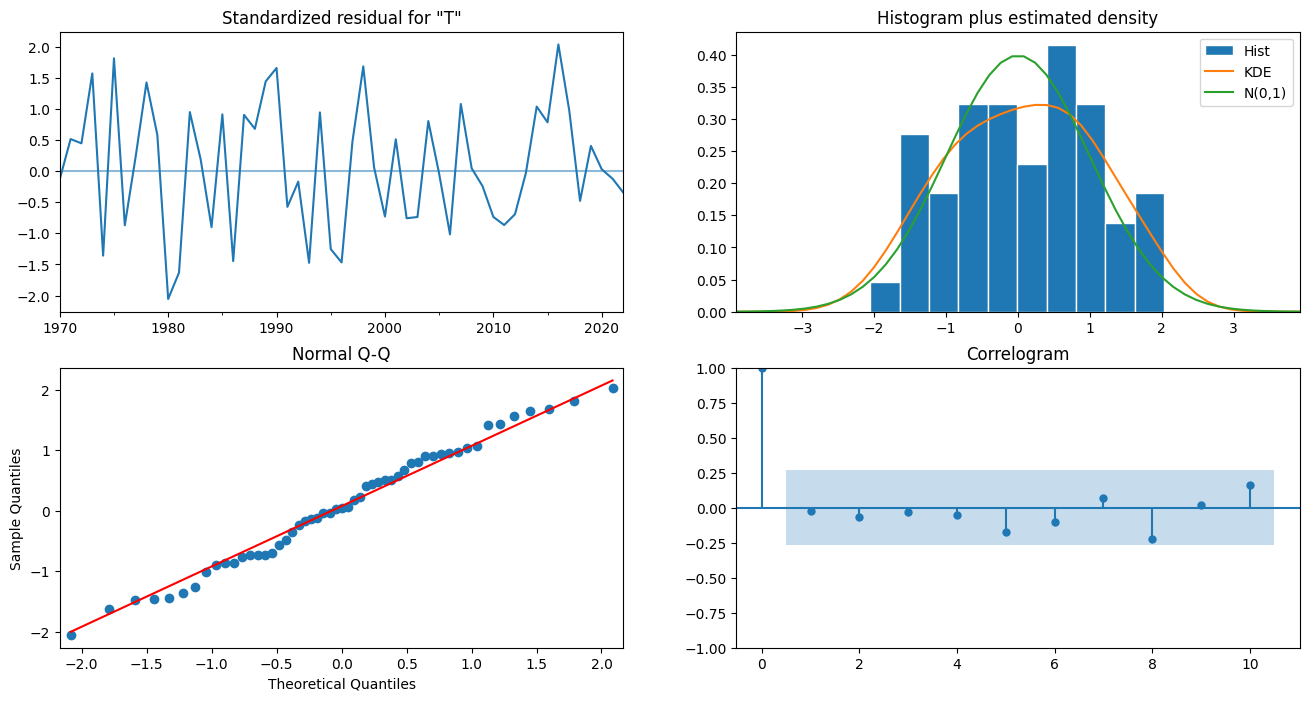

In [666]:
model_fit_temp_ma.plot_diagnostics(figsize=(16,8))
plt.show()

### **Sea Level**

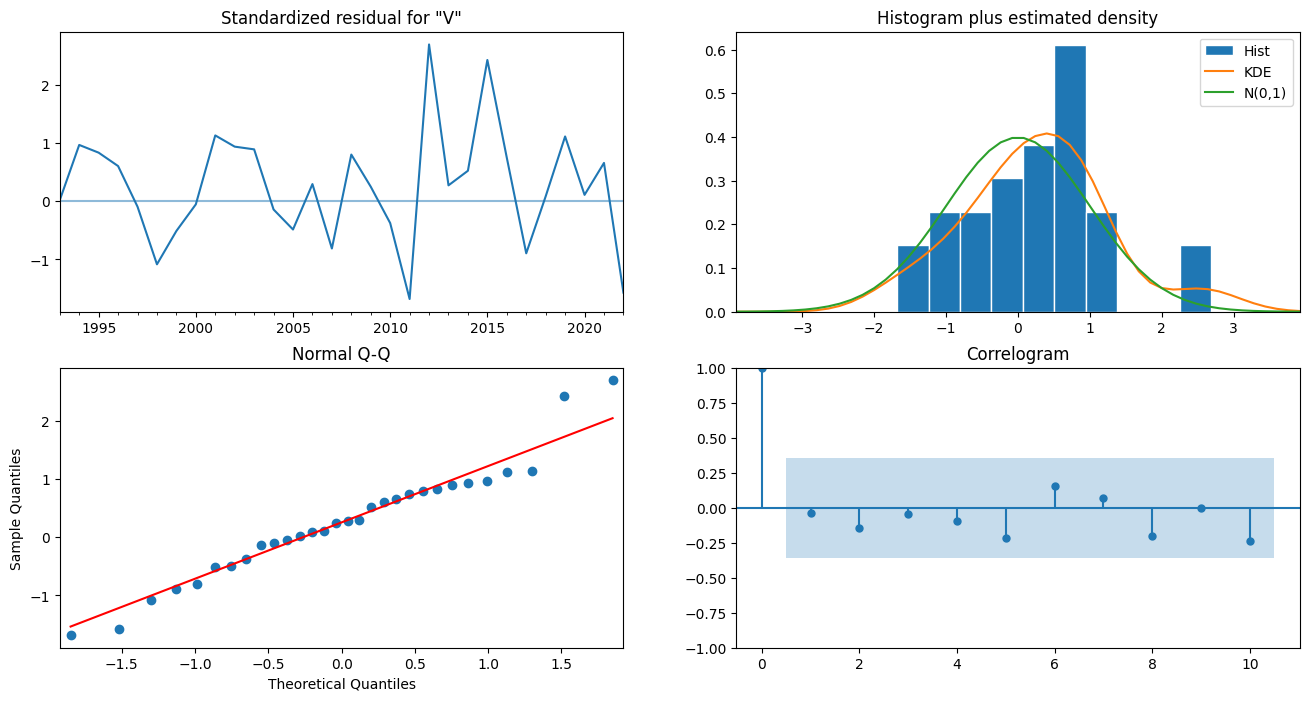

In [667]:
results_sea1.plot_diagnostics(figsize=(16,8))
plt.show()

<참고> 해석 방법

### 해석1. 잔차의 정상성

Standardized residual(좌상단) : 잔차의 시계열 데이터. 잔차의 시계열이 평균 0을 중심으로 변동하는 것으로 보임.
Correlogram (우하단) : 잔차에 대한 ACF 플롯. 어느정도 허용 범위(파란박스) 안에 위치하여 자기상관이 없음을 알 수 있음.

### 해석2. 잔차의 정규성

Histogram plus estimated density (우상단) : 잔차의 히스토그램을 그려 정규분포(N(0,1))와 밀도를 추정한 그래프.
Normal Q-Q (좌하단) : 양끝쪽 빨간 선을 대체로 만족한다. 정규성을 만족하려면 빨간 일직선 위에 점들이 분포해야 함.

# 7. **Forecasting** and  Model **Evaluation**

### **Surface Temperature**

In [668]:
temp_moving_avg.index = pd.to_datetime(temp_moving_avg.index)

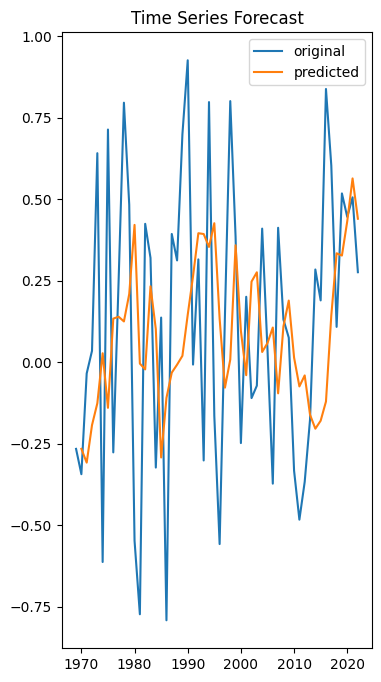

In [678]:
from pandas import datetime

start_index_temp = datetime(1970,1,1)
end_index_temp = datetime(2022,1,1)
forecast_temp = model_fit_temp_ma.predict(start=start_index_temp, end=end_index_temp)

plt.figure(figsize=(4,8))
plt.plot(temp_moving_avg.index, temp_moving_avg.Temp, label='original')
plt.plot(forecast_temp, label='predicted')
plt.title('Time Series Forecast')
plt.legend()
plt.show()

In [679]:
from sklearn import metrics

def scoring(y_true, y_pred):
    r2 = round(metrics.r2_score(y_true, y_pred) * 100, 3)
    #     mae = round(metrics.mean_absolute_error(y_true, y_pred),3)
    corr = round(np.corrcoef(y_true, y_pred)[0, 1], 3)
    mape = round(
        metrics.mean_absolute_percentage_error(y_true, y_pred) * 100, 3)
    rmse = round(metrics.mean_squared_error(y_true, y_pred, squared=False), 3)

    df = pd.DataFrame({
        'R2': r2,
        "Corr": corr,
        "RMSE": rmse,
        "MAPE": mape
    },
                      index=[0])
    return df

In [681]:
scoring(np.array(temp_moving_avg[temp_moving_avg.index>=start_index_temp].Temp),np.array(forecast_temp))

,R2,Corr,RMSE,MAPE
0,-16.081,0.083,0.473,204.795


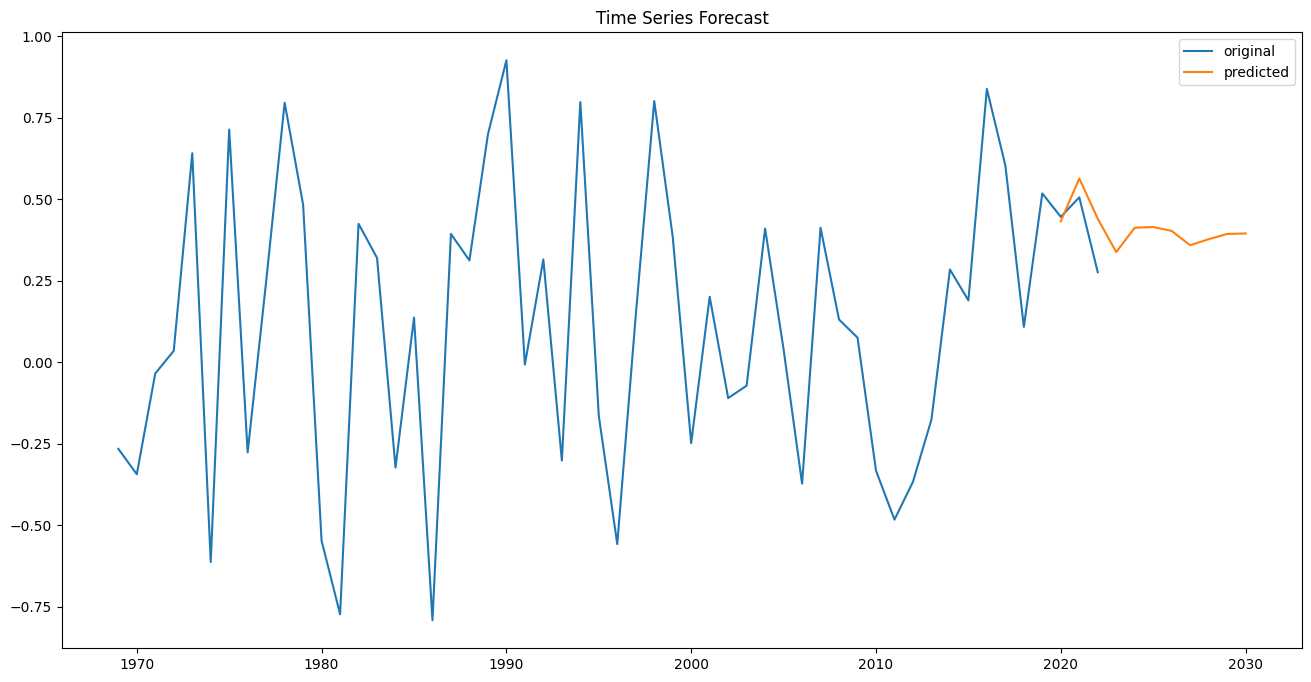

In [682]:
start_index_temp_2030 = datetime(2020,1,1)
end_index_temp_2030 = datetime(2030,1,1)
forecast_2030 = model_fit_temp_ma.predict(start=start_index_temp_2030, end=end_index_temp_2030)

plt.figure(figsize=(16,8))
plt.plot(temp_moving_avg.index, temp_moving_avg.Temp, label='original')
plt.plot(forecast_2030, label='predicted')
plt.title('Time Series Forecast')
plt.legend()
plt.show()

### **Sea Level**

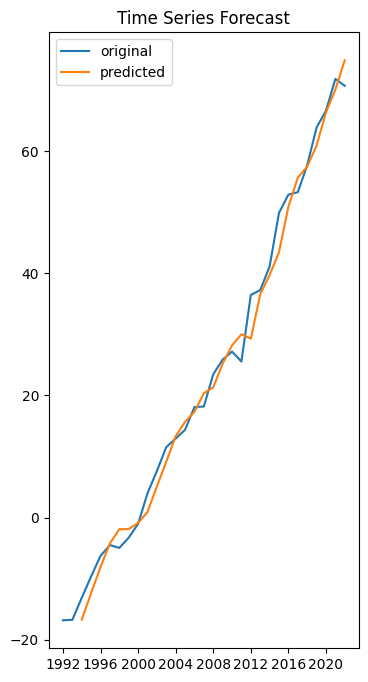

In [688]:
start_index_sea = datetime(1994,1,1)
end_index_sea = datetime(2022,1,1)
forecast_sea = results_sea1.predict(start=start_index_sea, end=end_index_sea)

plt.figure(figsize=(4,8))
plt.plot(df_sea_yearly.index, df_sea_yearly.Value, label='original')
plt.plot(forecast_sea, label='predicted')
plt.title('Time Series Forecast')
plt.legend()
plt.show()

In [684]:
scoring(np.array(df_sea_yearly[df_sea_yearly.index>=start_index_sea].Value),np.array(forecast_sea))

,R2,Corr,RMSE,MAPE
0,98.849,0.995,2.78,15.93


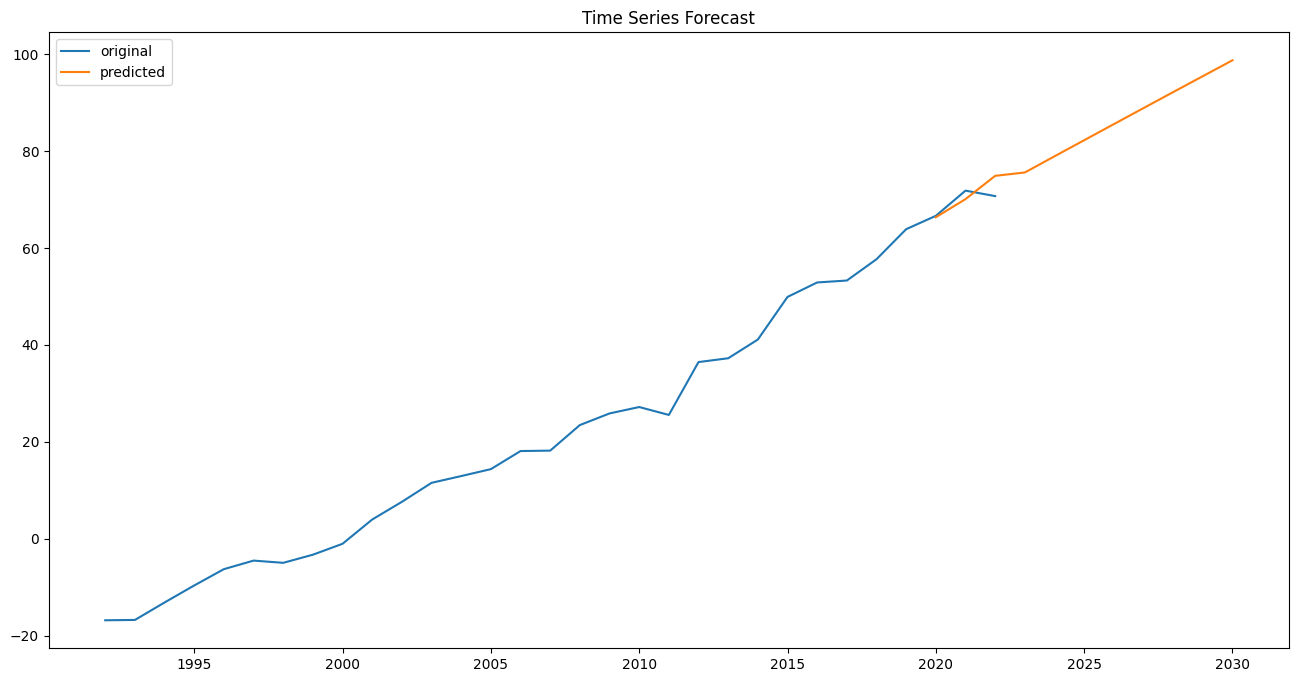

In [690]:
start_index_sea_2030 = datetime(2020,1,1)
end_index_sea_2030 = datetime(2030,1,1)
forecast_sea_2030 = results_sea1.predict(start=start_index_sea_2030, end=end_index_sea_2030)

plt.figure(figsize=(16,8))
plt.plot(df_sea_yearly.index, df_sea_yearly.Value, label='original')
plt.plot(forecast_sea_2030, label='predicted')
plt.title('Time Series Forecast')
plt.legend()
plt.show()

# 9. Relationship between **Temperature** and **Sea-level** : **Dynamic Linear Model**

#### New data : CO2

In [693]:
df_co2 = pd.read_csv("C:/Users/USER/Desktop/Time Series Analysis/Term Project/co2_concent.csv")

In [694]:
df_co2.head()

,ObjectId,Country,ISO2,ISO3,Indicator,Unit,Source,CTS_Code,CTS_Name,CTS_Full_Descriptor,Date,Value
0,1,World,NaN,WLD,Monthly Atmospheric Carbon Dioxide Concentrations,Parts Per Million,"Dr. Pieter Tans, National Oceanic and Atmosphe...",ECCA,Atmospheric Carbon Dioxide Concentrations,"Environment, Climate Change, Climate Indicator...",1958M03,315.70
1,2,World,NaN,WLD,Monthly Atmospheric Carbon Dioxide Concentrations,Parts Per Million,"Dr. Pieter Tans, National Oceanic and Atmosphe...",ECCA,Atmospheric Carbon Dioxide Concentrations,"Environment, Climate Change, Climate Indicator...",1958M04,317.45
2,3,World,NaN,WLD,Monthly Atmospheric Carbon Dioxide Concentrations,Parts Per Million,"Dr. Pieter Tans, National Oceanic and Atmosphe...",ECCA,Atmospheric Carbon Dioxide Concentrations,"Environment, Climate Change, Climate Indicator...",1958M05,317.51
3,4,World,NaN,WLD,Monthly Atmospheric Carbon Dioxide Concentrations,Parts Per Million,"Dr. Pieter Tans, National Oceanic and Atmosphe...",ECCA,Atmospheric Carbon Dioxide Concentrations,"Environment, Climate Change, Climate Indicator...",1958M06,317.24
4,5,World,NaN,WLD,Monthly Atmospheric Carbon Dioxide Concentrations,Parts Per Million,"Dr. Pieter Tans, National Oceanic and Atmosphe...",ECCA,Atmospheric Carbon Dioxide Concentrations,"Environment, Climate Change, Climate Indicator...",1958M07,315.86


In [695]:
df_co2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1554 entries, 0 to 1553
Data columns (total 12 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   ObjectId             1554 non-null   int64  
 1   Country              1554 non-null   object 
 2   ISO2                 0 non-null      float64
 3   ISO3                 1554 non-null   object 
 4   Indicator            1554 non-null   object 
 5   Unit                 1554 non-null   object 
 6   Source               1554 non-null   object 
 7   CTS_Code             1554 non-null   object 
 8   CTS_Name             1554 non-null   object 
 9   CTS_Full_Descriptor  1554 non-null   object 
 10  Date                 1554 non-null   object 
 11  Value                1554 non-null   float64
dtypes: float64(2), int64(1), object(9)
memory usage: 145.8+ KB


co2 데이터 //
1958-2023 //
Unit: 'Parts Per Million', 'Percent'
=> 1958년 데이터는 'Percent' 없음, 'Parts Per Million'으로 통일

In [696]:
df_co2 = df_co2[df_co2['Unit']=='Parts Per Million'].copy()
df_co2.drop(['ObjectId', 'Country', 'ISO2', 'ISO3', 'Indicator', 'Unit', 'Source','CTS_Code', 'CTS_Name', 'CTS_Full_Descriptor'], axis=1, inplace=True)
df_co2

,Date,Value
0,1958M03,315.70
1,1958M04,317.45
2,1958M05,317.51
3,1958M06,317.24
4,1958M07,315.86
...,...,...
1544,2023M01,419.48
1546,2023M02,420.30
1548,2023M03,420.98
1550,2023M04,423.36


In [697]:
df_co2['Year'] = df_co2['Date'].str[:4]

df_co2_yearly = df_co2.groupby('Year')['Value'].mean().reset_index()
df_co2_yearly.set_index('Year', inplace=True)
df_co2_yearly

,Value
Year,
1958,315.232000
1959,315.980833
1960,316.910000
1961,317.644167
1962,318.454167
...,...
2019,411.654167
2020,414.238333
2021,416.450833


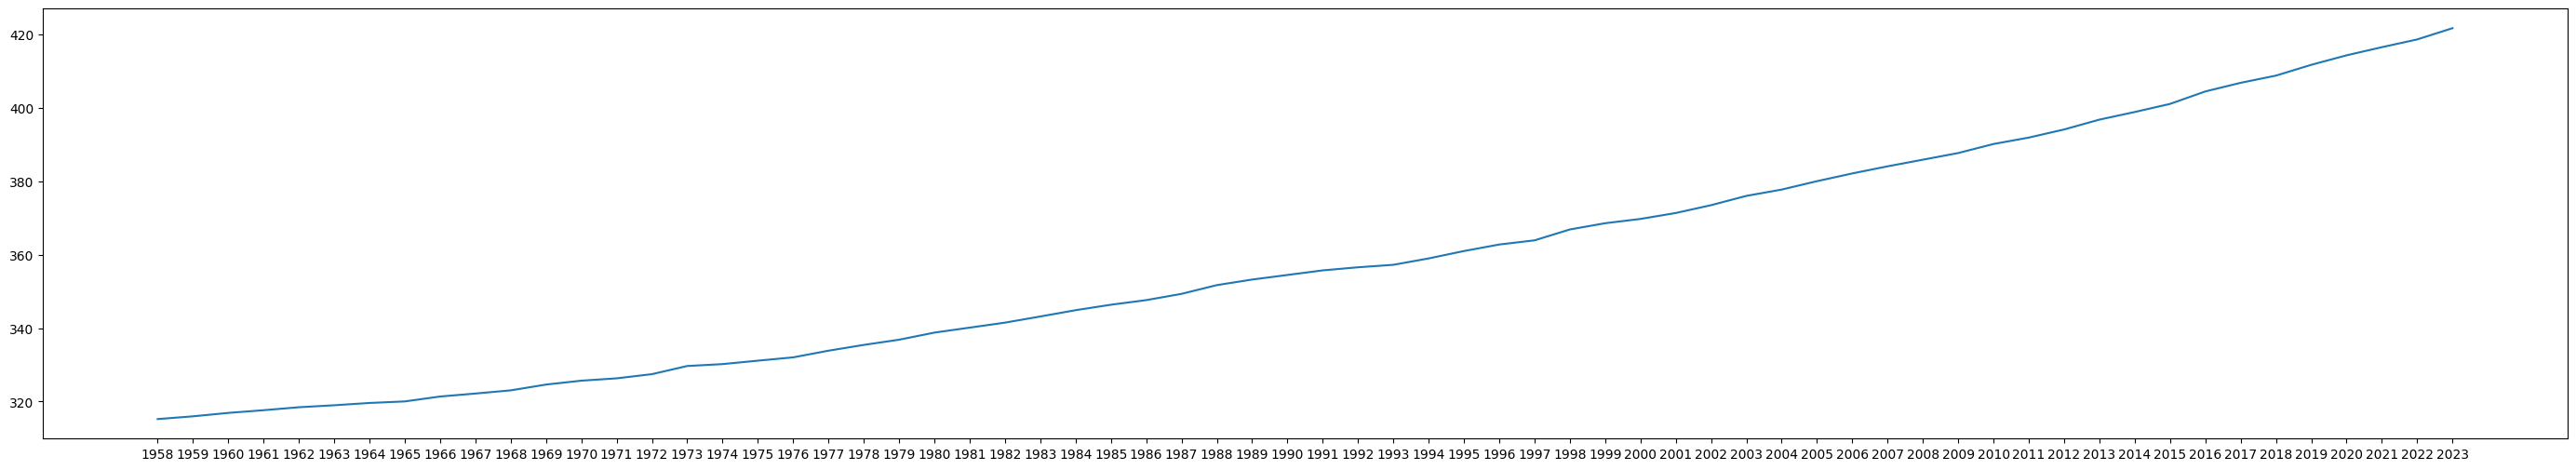

In [698]:
plt.plot(df_co2_yearly)

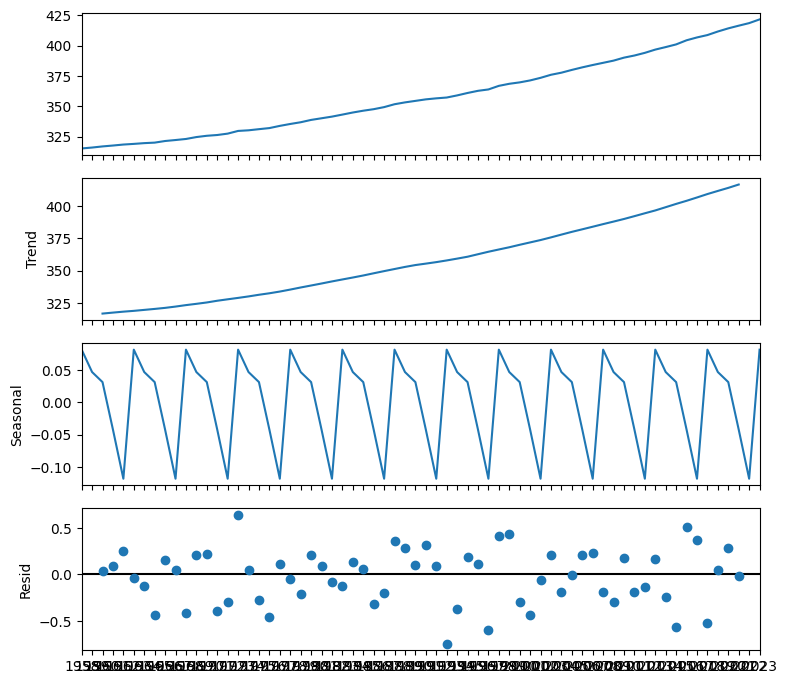

In [699]:
decomposition_co2 = sm.tsa.seasonal_decompose(df_co2_yearly, model='additive', period=5)  # Not Meaningful Period

ax = decomposition_co2.plot()
ax.set_size_inches(7,7)

plt.show()

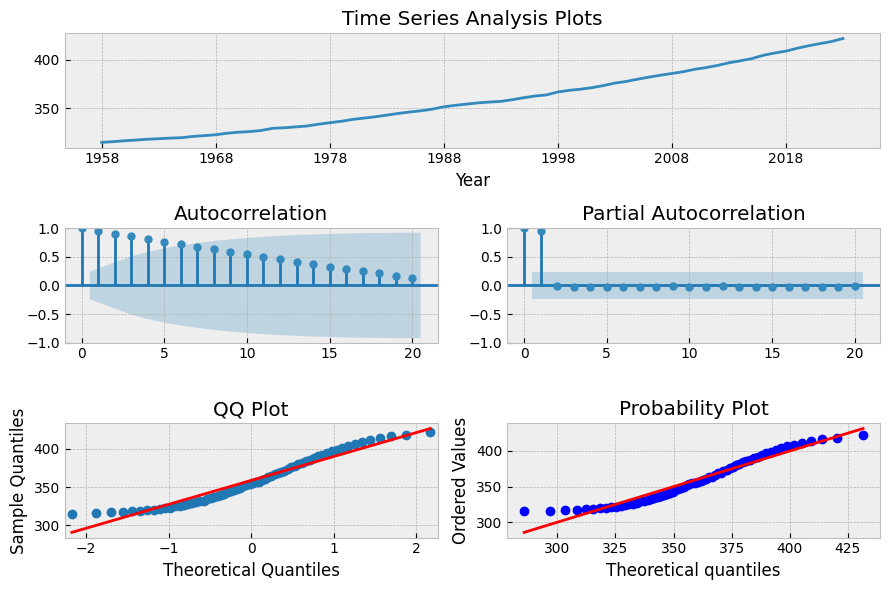

In [700]:
raw_co2 = tsplot(df_co2_yearly['Value'], lags=20)

Raw data
           Value
Year            
1958  315.232000
1959  315.980833
1960  316.910000
1961  317.644167
1962  318.454167
...          ...
2019  411.654167
2020  414.238333
2021  416.450833
2022  418.564167
2023  421.624000

[66 rows x 1 columns]
After 1st difference
Year
1959    0.748833
1960    0.929167
1961    0.734167
1962    0.810000
1963    0.538333
          ...   
2019    2.939167
2020    2.584167
2021    2.212500
2022    2.113333
2023    3.059833
Name: Value, Length: 65, dtype: float64


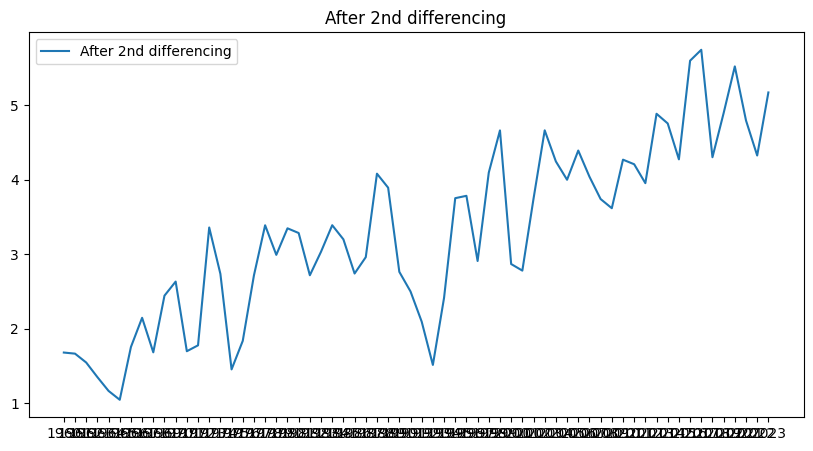

In [701]:
#1st diffrence
diff_df_co2_yearly = df_co2_yearly['Value'].diff(periods=1).iloc[1:]

print('Raw data')
print(df_co2_yearly)

print('After 1st difference')
print(diff_df_co2_yearly)

diff_2_df_co2_yearly = df_co2_yearly['Value'].diff(periods=2).iloc[2:]

plt.figure(figsize=(10,5))
plt.plot(diff_2_df_co2_yearly, label='After 2nd differencing')
plt.legend(loc='best')
plt.title('After 2nd differencing')
plt.show()

In [702]:
adf_test = adfuller(diff_df_co2_yearly)

print('ADF Statistic: %f' % adf_test[0])
print('Critical Values @ 0.05: %.2f' % adf_test[4]['5%'])
print('p-value: %20.20f' % adf_test[1])

adf_test = adfuller(diff_2_df_co2_yearly)
print('---------------------')
print('ADF Statistic: %f' % adf_test[0])
print('Critical Values @ 0.05: %.2f' % adf_test[4]['5%'])
print('p-value: %20.20f' % adf_test[1])

ADF Statistic: -1.178200
Critical Values @ 0.05: -2.91
p-value: 0.68290255610258765451
---------------------
ADF Statistic: -0.696861
Critical Values @ 0.05: -2.92
p-value: 0.84756083935034531862


전부 p-value > 0.05, not-reliable

In [703]:
df_log_co2_yearly = np.log(df_co2_yearly['Value'])

#1st differencing with logarithm
diff_df_log_co2_yearly = df_log_co2_yearly.diff(periods=1).iloc[1:]

#2nd differencing with logarithm
diff_2_df_log_co2_yearly = df_log_co2_yearly.diff(periods=2).iloc[2:]

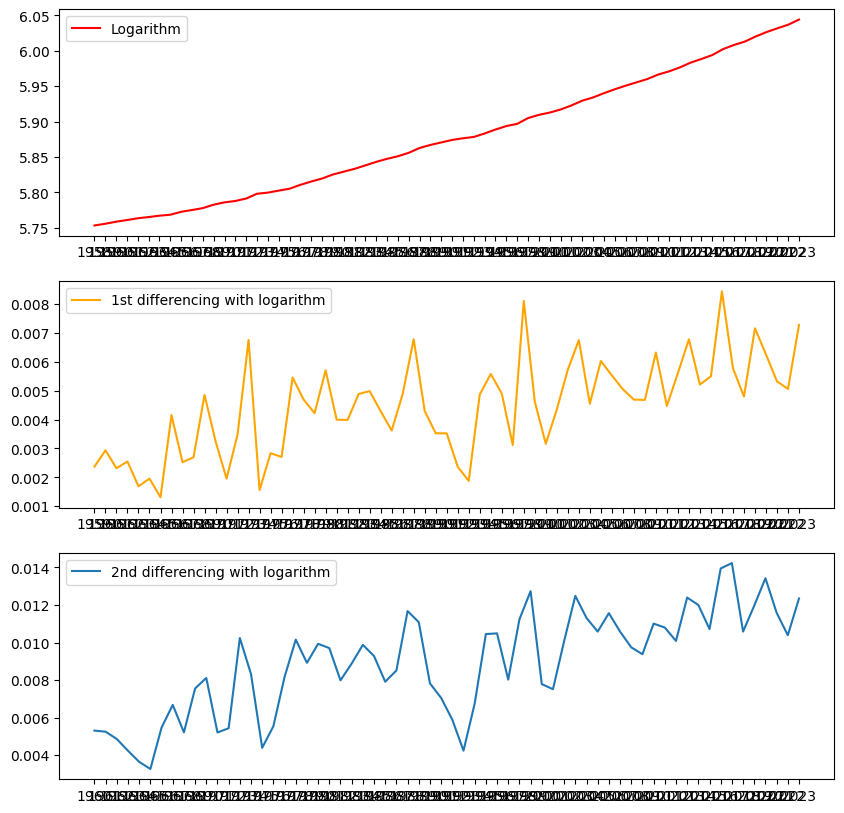

In [704]:
plt.figure(figsize=(10,10))

ax1 = plt.subplot(311)
ax1.plot(df_log_co2_yearly, color='red')
ax1.legend(['Logarithm'])


ax2 = plt.subplot(312)
ax2.plot(diff_df_log_co2_yearly, color='orange')
ax2.legend(['1st differencing with logarithm'])

ax3 =plt.subplot(313)
ax3.plot(diff_2_df_log_co2_yearly)
ax3.legend(['2nd differencing with logarithm'])

In [705]:
adf_test = adfuller(diff_df_log_co2_yearly)
adf_test_ = adfuller(diff_2_df_log_co2_yearly)

print('---1st differencing with logarithm---')
print('ADF Statistic: %f' % adf_test[0])
print('Critical Values @ 0.05: %.2f' % adf_test[4]['5%'])
print('p-value: %20.20f' % adf_test[1])


print('\n---2nd differencing with logarithm---')
print('ADF Statistic: %f' % adf_test_[0])
print('Critical Values @ 0.05: %.2f' % adf_test_[4]['5%'])
print('p-value: %20.20f' % adf_test_[1])

---1st differencing with logarithm---
ADF Statistic: -1.929609
Critical Values @ 0.05: -2.91
p-value: 0.31826267686576420468

---2nd differencing with logarithm---
ADF Statistic: -2.061112
Critical Values @ 0.05: -2.91
p-value: 0.26043641683297941158


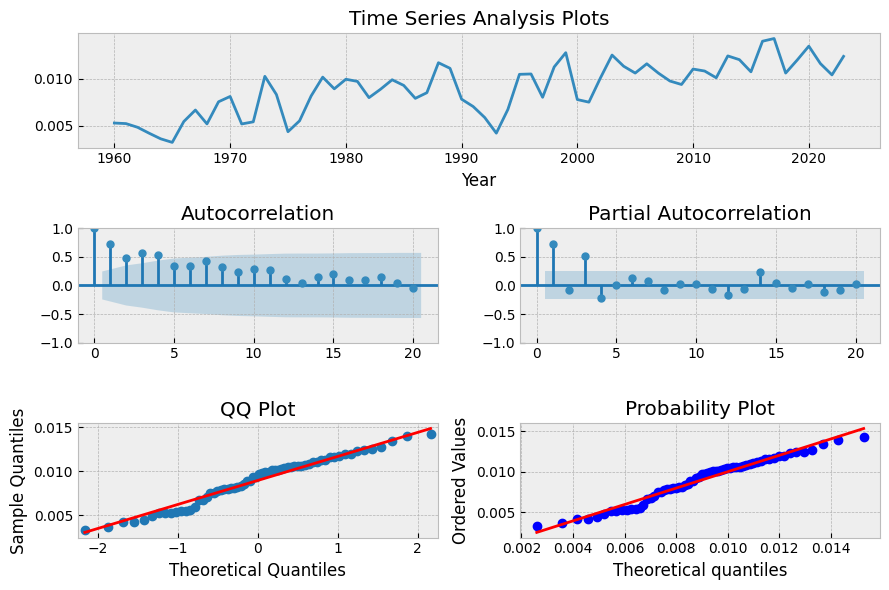

In [706]:
diff_2_plot= tsplot(diff_2_df_log_co2_yearly, lags=20)

ARMA(3,4)

In [707]:
model = sm.tsa.arima.ARIMA(df_log_co2_yearly, order= (3,2,4)).fit()

print(model.summary())

                               SARIMAX Results                                
Dep. Variable:                  Value   No. Observations:                   66
Model:                 ARIMA(3, 2, 4)   Log Likelihood                 337.405
Date:                Mon, 27 Nov 2023   AIC                           -658.810
Time:                        18:25:59   BIC                           -641.539
Sample:                    01-01-1958   HQIC                          -652.006
                         - 01-01-2023                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -1.0912      2.211     -0.493      0.622      -5.426       3.243
ar.L2         -1.1579      0.751     -1.541      0.123      -2.630       0.315
ar.L3         -0.6644      2.019     -0.329      0.7

In [708]:
model = pm.auto_arima(df_log_co2_yearly, d=2,
                      start_p=0, start_q=0, max_order=6, test='adf',
                      stepwise=True, trace=True)

Performing stepwise search to minimize aic
 ARIMA(0,2,0)(0,0,0)[0]             : AIC=-628.617, Time=0.02 sec
 ARIMA(1,2,0)(0,0,0)[0]             : AIC=-636.493, Time=0.02 sec
 ARIMA(0,2,1)(0,0,0)[0]             : AIC=-658.323, Time=0.03 sec
 ARIMA(1,2,1)(0,0,0)[0]             : AIC=-609.759, Time=0.03 sec
 ARIMA(0,2,2)(0,0,0)[0]             : AIC=-650.260, Time=0.06 sec
 ARIMA(1,2,2)(0,0,0)[0]             : AIC=-652.959, Time=0.06 sec
 ARIMA(0,2,1)(0,0,0)[0] intercept   : AIC=-658.793, Time=0.04 sec
 ARIMA(0,2,0)(0,0,0)[0] intercept   : AIC=-626.738, Time=0.02 sec
 ARIMA(1,2,1)(0,0,0)[0] intercept   : AIC=-607.321, Time=0.06 sec
 ARIMA(0,2,2)(0,0,0)[0] intercept   : AIC=-661.879, Time=0.11 sec
 ARIMA(1,2,2)(0,0,0)[0] intercept   : AIC=-660.515, Time=0.16 sec
 ARIMA(0,2,3)(0,0,0)[0] intercept   : AIC=-662.241, Time=0.14 sec
 ARIMA(1,2,3)(0,0,0)[0] intercept   : AIC=-660.258, Time=0.08 sec
 ARIMA(0,2,4)(0,0,0)[0] intercept   : AIC=-660.588, Time=0.09 sec
 ARIMA(1,2,4)(0,0,0)[0] intercept

In [709]:
model = sm.tsa.arima.ARIMA(df_log_co2_yearly, order= (0,2,3))
results = model.fit()

print(results.summary())

                               SARIMAX Results                                
Dep. Variable:                  Value   No. Observations:                   66
Model:                 ARIMA(0, 2, 3)   Log Likelihood                 333.194
Date:                Mon, 27 Nov 2023   AIC                           -658.389
Time:                        18:26:08   BIC                           -649.753
Sample:                    01-01-1958   HQIC                          -654.987
                         - 01-01-2023                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ma.L1         -0.7633      0.134     -5.704      0.000      -1.026      -0.501
ma.L2         -0.1855      0.197     -0.940      0.347      -0.572       0.201
ma.L3          0.1681      0.135      1.245      0.2

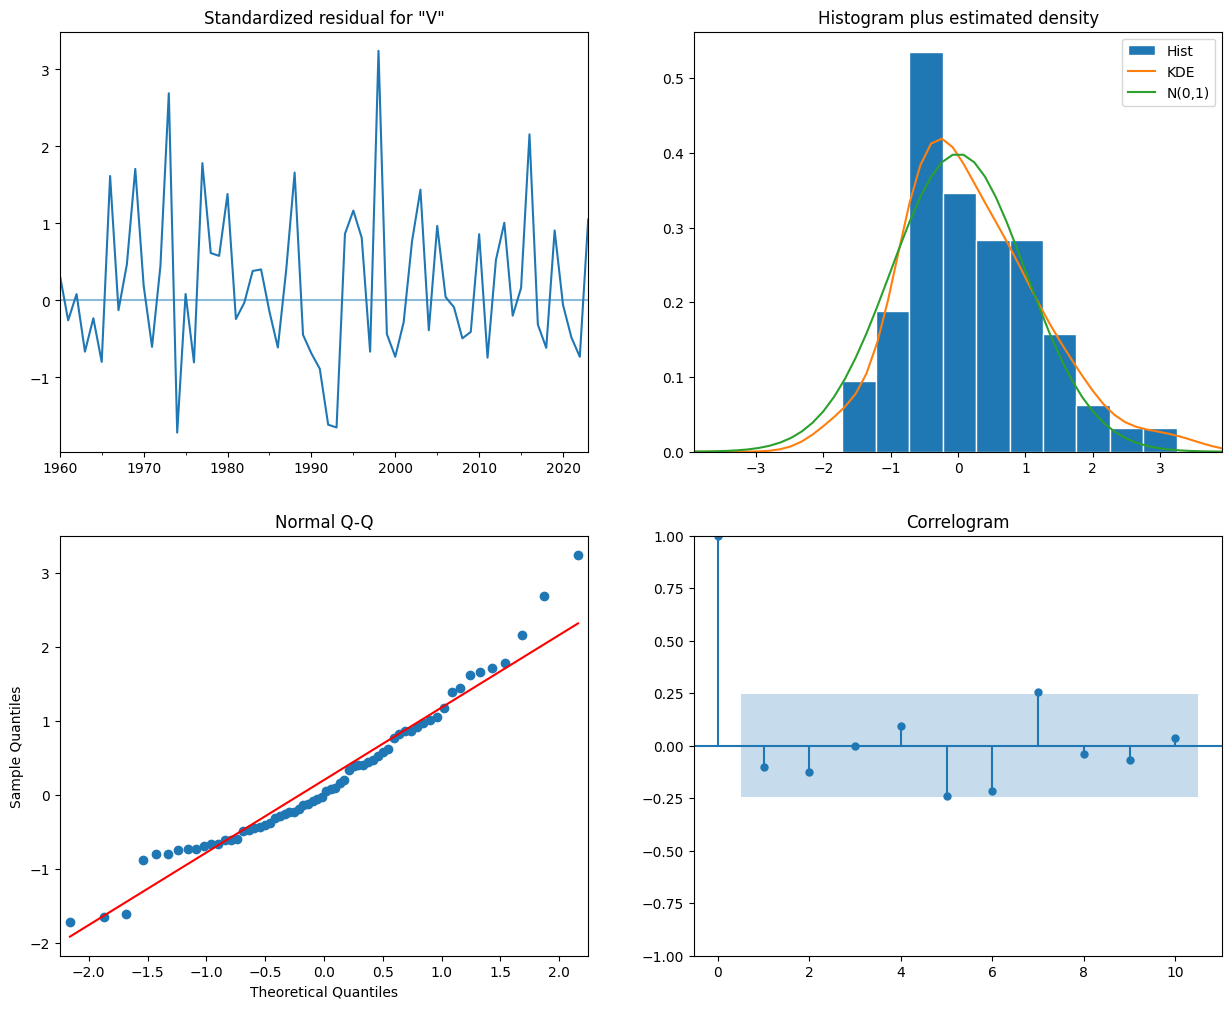

In [710]:
results.plot_diagnostics(figsize=(15,12))
plt.show()

In [711]:
!pip install pydlm

     ---------------------------------------- 63.8/63.8 kB 3.3 MB/s eta 0:00:00


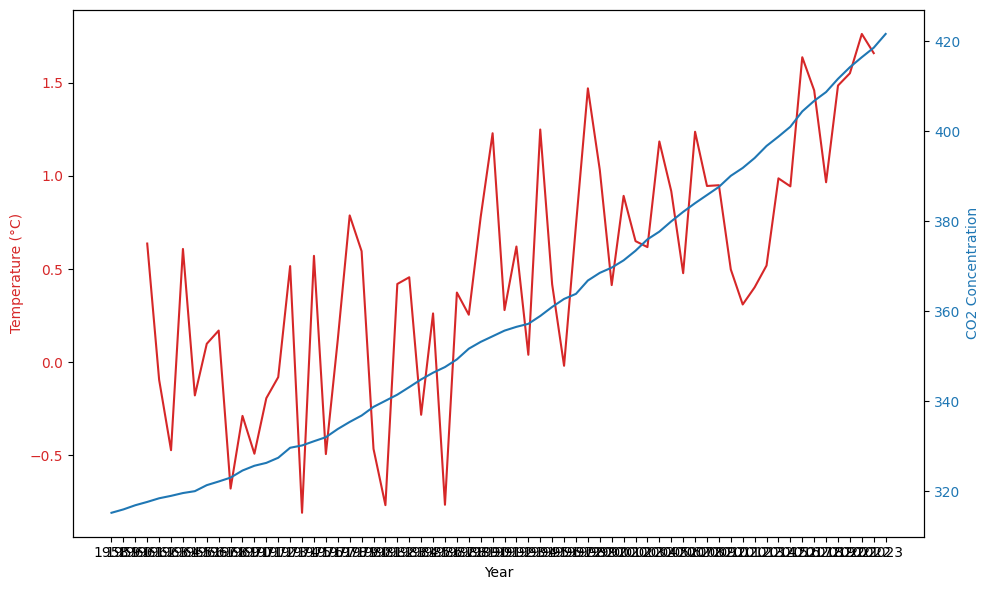

In [712]:
temp_min = df_temp_kor['Temp'].min()
temp_max = df_temp_kor['Temp'].max()
co2_min = df_co2_yearly['Value'].min()
co2_max = df_co2_yearly['Value'].max()

# 왼쪽 y축에 df_temp_kor 값 표시
fig, ax1 = plt.subplots(figsize=(10, 6))

color = 'tab:red'
ax1.set_xlabel('Year')
ax1.set_ylabel('Temperature (°C)', color=color)
ax1.plot(df_temp_kor.index, df_temp_kor['Temp'], color=color)
ax1.tick_params(axis='y', labelcolor=color)

# 오른쪽 y축에 df_co2_yearly 값 표시
ax2 = ax1.twinx()
color = 'tab:blue'
ax2.set_ylabel('CO2 Concentration', color=color)
ax2.plot(df_co2_yearly.index, df_co2_yearly['Value'], color=color)
ax2.tick_params(axis='y', labelcolor=color)

fig.tight_layout()
plt.show()

In [713]:
pip install pykalman


     -------------------------------------- 228.9/228.9 kB 7.1 MB/s eta 0:00:00
  Preparing metadata (setup.py): started
  Preparing metadata (setup.py): finished with status 'done'
  Created wheel for pykalman: filename=pykalman-0.9.5-py3-none-any.whl size=48450 sha256=4fc044a5672d1948eefb013f33d4054d2462fe90e08da80a6d128710cb43e354
  Stored in directory: c:\users\user\appdata\local\pip\cache\wheels\76\33\ef\5f332226e13a5089c6dd4b01cc2bcb59491d18f955fa2d3807
Successfully built pykalman


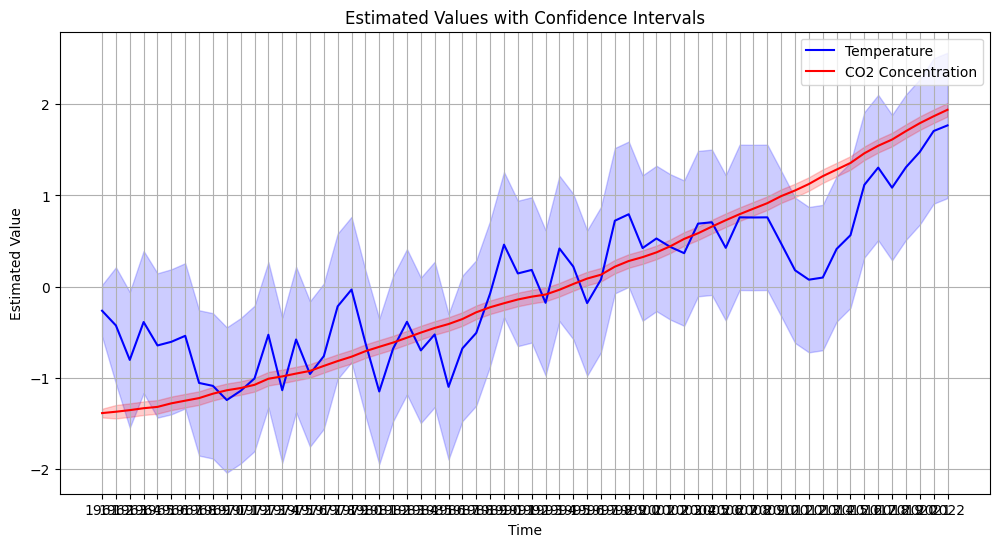

In [714]:
from pykalman import KalmanFilter
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

y1 = df_temp_kor['Temp']
y2 = df_co2_yearly['Value']
y2 = y2[3:65]

y1_normalized = (y1 - y1.mean()) / y1.std()
y2_normalized = (y2 - y2.mean()) / y2.std()

y_stacked = np.column_stack((y1_normalized, y2_normalized))

# Kalman Filter 모델 생성
kf = KalmanFilter(initial_state_mean=np.zeros(2), n_dim_obs=2)
kf = kf.em(y_stacked, n_iter=10)

filtered_state_means, filtered_state_covariances = kf.filter(y_stacked)

plt.figure(figsize=(12, 6))
plt.plot(y1.index, filtered_state_means[:, 0], label='Temperature', linestyle='-', color='blue')
plt.plot(y2.index, filtered_state_means[:, 1], label='CO2 Concentration', linestyle='-', color='red')
plt.fill_between(y1.index, filtered_state_means[:, 0] - 2 * np.sqrt(filtered_state_covariances[:, 0, 0]),
                 filtered_state_means[:, 0] + 2 * np.sqrt(filtered_state_covariances[:, 0, 0]), alpha=0.2, color='blue')
plt.fill_between(y2.index, filtered_state_means[:, 1] - 2 * np.sqrt(filtered_state_covariances[:, 1, 1]),
                 filtered_state_means[:, 1] + 2 * np.sqrt(filtered_state_covariances[:, 1, 1]), alpha=0.2, color='red')
plt.xlabel('Time')
plt.ylabel('Estimated Value')
plt.title('Estimated Values with Confidence Intervals')
plt.legend()
plt.grid(True)
plt.show()